### Content
* [Introduction](#1)
* [Data Visualization & EDA](#2)
* [Reframing the Initial Problem Statement](#2.1)
* [Cluster Station_Ids](#2.2)

* [Feature Engineering](#3)

* [Prepare datasets for Traffic Volume Prediction](#4)
* [Model Training](#5)
* [Model Evaluation](#6)
* [Feature Importance](#7)
* [Hyperparameter Tuning](#8)
* [Model Train-Test Evaluation](#9)
* [Conclusion](#10)

#### Introduction<a class="anchor" id="1"></a>
The data for the assignment is the 2015 traffic data on [Kaggle](https://www.kaggle.com/jboysen/us-traffic-2015) Two data files are available, and are downloaded into the archive folder. A brief description for the two datasets provided on the Kaggle site gave very top level idea on the datasets. 

To assist in interpretation of the column headers and class labels, we reference Chapter 6 of the US Traffic Monitoring Guide ver. May 1, 2001 as well. The document is uploaded onto gitHub repo for ease of reference as well. Referencing the document, an abridged data dictionary is developed and documented within the README to facilitate understanding of the dataset. 

The initial problem statement is to identify top 5 most obvious patterns from the data, engineer features from insights gained from data visualizations and build a model that best represents the data.


In [1]:
# Step 1 import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',60)
plt.style.use('default')

print('libraries imported, settings set.')

libraries imported, settings set.


With the files downloaded and unzipped into the "archive" folder, let's load it onto DataFrames using pandas.

In [2]:
# Step 2a: Read traffic station data into a DataFrame
filePath1 = './archive/dot_traffic_stations_2015.txt.gz'
dfStatn = pd.read_csv(filePath1, compression='gzip', header=0, sep=',', quotechar='"')
# check the data loaded
display(dfStatn.head(1))
dfStatn.shape

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97


(28466, 55)

In [3]:
# Step 2a: Check data type
dfStatn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28466 entries, 0 to 28465
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   algorithm_of_vehicle_classification               18576 non-null  object 
 1   algorithm_of_vehicle_classification_name          17335 non-null  object 
 2   calibration_of_weighing_system                    8165 non-null   object 
 3   calibration_of_weighing_system_name               6681 non-null   object 
 4   classification_system_for_vehicle_classification  28466 non-null  int64  
 5   concurrent_route_signing                          28466 non-null  int64  
 6   concurrent_signed_route_number                    13592 non-null  object 
 7   direction_of_travel                               28466 non-null  int64  
 8   direction_of_travel_name                          28466 non-null  object 
 9   fips_county_code 

In [4]:
# Step 2b: Read traffic data into a DataFrame
filePath2 = './archive/dot_traffic_2015.txt.gz'
dfTraffic = pd.read_csv(filePath2, compression='gzip', header=0, sep=',', quotechar='"')
# check the data loaded
display(dfTraffic.head(1))
dfTraffic.shape

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,restrictions,station_id,traffic_volume_counted_after_0000_to_0100,traffic_volume_counted_after_0100_to_0200,traffic_volume_counted_after_0200_to_0300,traffic_volume_counted_after_0300_to_0400,traffic_volume_counted_after_0400_to_0500,traffic_volume_counted_after_0500_to_0600,traffic_volume_counted_after_0600_to_0700,traffic_volume_counted_after_0700_to_0800,traffic_volume_counted_after_0800_to_0900,traffic_volume_counted_after_0900_to_1000,traffic_volume_counted_after_1000_to_1100,traffic_volume_counted_after_1100_to_1200,traffic_volume_counted_after_1200_to_1300,traffic_volume_counted_after_1300_to_1400,traffic_volume_counted_after_1400_to_1500,traffic_volume_counted_after_1500_to_1600,traffic_volume_counted_after_1600_to_1700,traffic_volume_counted_after_1700_to_1800,traffic_volume_counted_after_1800_to_1900,traffic_volume_counted_after_1900_to_2000,traffic_volume_counted_after_2000_to_2100,traffic_volume_counted_after_2100_to_2200,traffic_volume_counted_after_2200_to_2300,traffic_volume_counted_after_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,NaN,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15


(7140391, 38)

In [5]:
# Step 2b: Check data type
dfTraffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   date                                       object 
 1   day_of_data                                int64  
 2   day_of_week                                int64  
 3   direction_of_travel                        int64  
 4   direction_of_travel_name                   object 
 5   fips_state_code                            int64  
 6   functional_classification                  object 
 7   functional_classification_name             object 
 8   lane_of_travel                             int64  
 9   month_of_data                              int64  
 10  record_type                                int64  
 11  restrictions                               float64
 12  station_id                                 object 
 13  traffic_volume_counted_after_0000_to_0100 

In [6]:
# 3a: Check missing data in traffic station data
dfStatn.isnull().sum()

algorithm_of_vehicle_classification                  9890
algorithm_of_vehicle_classification_name            11131
calibration_of_weighing_system                      20301
calibration_of_weighing_system_name                 21785
classification_system_for_vehicle_classification        0
concurrent_route_signing                                0
concurrent_signed_route_number                      14874
direction_of_travel                                     0
direction_of_travel_name                                0
fips_county_code                                        0
fips_state_code                                         0
functional_classification                               0
functional_classification_name                          0
hpms_sample_identifier                              15248
hpms_sample_type                                        0
lane_of_travel                                          0
lane_of_travel_name                                     0
latitude      

In [7]:
#Step 3a.1 Investigate algorithm_of_vehicle_classification and next three columns
dfStatn.loc[dfStatn['algorithm_of_vehicle_classification'].isnull()]

,algorithm_of_vehicle_classification,algorithm_of_vehicle_classification_name,calibration_of_weighing_system,calibration_of_weighing_system_name,classification_system_for_vehicle_classification,concurrent_route_signing,concurrent_signed_route_number,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_identifier,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,lrs_identification,lrs_location_point,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,posted_signed_route_number,previous_station_id,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,sample_type_for_truck_weight,sample_type_for_truck_weight_name,sample_type_for_vehicle_classification,sample_type_for_vehicle_classification_name,second_type_of_sensor,shrp_site_identification,station_id,station_location,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,NaN,NaN,NaN,NaN,13,3,091,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,NaN,N,4,Other lanes,33.850898,117.814391,00000000091R,NaN,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,5,5,0,0,3,091,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,129130,LAKEVIEW AVENUE ORA91R10.091,L,Inductance loop,15,0,97
1,NaN,NaN,NaN,NaN,13,3,099,5,South,77,6,3R,Rural: Principal Arterial - Other,NaN,N,1,Outside (rightmost) lane,37.874697,121.219590,00000000099R,248336.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,3,099,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,N,NaN,100190,LITTLE JOHN CREEK SJ9912.526,L,Inductance loop,15,0,97
5,NaN,NaN,NaN,NaN,13,0,NaN,3,East,27,16,1U,Urban: Principal Arterial - Interstate,EHUBBWQBVKPC,Y,1,Outside (rightmost) lane,43.599300,116.558919,001010,35701.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,2,2,0,0,1,84,NaN,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,NaN,NaN,N,Station not used for Heavy Vehicle Travel Info...,NaN,NaN,000276,I-84 300 Ft. W of Beg EB Off,L,Inductance loop,15,0,13
9,NaN,NaN,NaN,NaN,13,2,00000017,5,South,177,51,1U,Urban: Principal Arterial - Interstate,NaN,N,0,Data with lanes combined,38.247320,77.507210,000000000000,0.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,3,3,0,0,1,00000095,000000,O,Operations purposes but not ITS,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,N,Station not used for Heavy Vehicle Travel Info...,X,NaN,160004,I-95 SOUTH SHOULDER @ MM 126.8,X,Radio wave,15,0,9
11,NaN,NaN,NaN,NaN,15,3,00000045,5,South,101,12,3U,Urban: Principal Arterial - Other,NaN,N,2,Other lanes,28.189800,82.465810,001401000000,2111.0,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,NaN,0,NaN,Y,4,4,0,0,2,00000041,000013,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,Station not used for any of the above,NaN,NaN,P,0000,140013,SR-45/US-410.4 MI. N OF DALE,L,Inductance loop,15,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

From the column names, the columns are paired - with the first column being label values, the second being label category names.
Check if there is any pattern in missing values for
* algorithm_of_vehicle_classification
* algorithm_of_vehicle_classification_name
* calibration_of_weighing_system
* calibration_of_weighing_system_name

In [8]:
dfStatn_subset = dfStatn.iloc[:,0:4].copy()
dfStatn_subset.shape

(28466, 4)

In [9]:
dfStatn_subset.loc[dfStatn_subset['algorithm_of_vehicle_classification'].isnull()].isnull().sum()

algorithm_of_vehicle_classification         9890
algorithm_of_vehicle_classification_name    9890
calibration_of_weighing_system              9735
calibration_of_weighing_system_name         9815
dtype: int64

Looking at the subset of the values, missing algorithm_of_vehicle_classification value drives the majority of missing values for algorithm_of_vehicle_classification name. However it is not the sole factor driving missing value for calibration of weighing system columns. 
Imputation through available-case analysis is limited due to the sheer volume of missing values. We note this and move on. 

A concurrency in a road network is an instance of one physical roadway bearing two or more different route numbers. The concurrent_signed_route_number column most likely indicates the route number assigned for concurrency. If there is no route number, it is NaN. 

In [10]:
# Replace NaN with 0 for concurrent_signed_route_number
dfStatn['concurrent_signed_route_number'] = dfStatn['concurrent_signed_route_number'].fillna(0)
# Check NaN imputation
dfStatn['concurrent_signed_route_number'].isnull().sum()

0

In [11]:
#Step 3a.4 Investigate hmps identifier column
dfStatn_subset = dfStatn.iloc[:,13:15].copy()
dfStatn_subset.head(20)

,hpms_sample_identifier,hpms_sample_type
0,NaN,N
1,NaN,N
2,NaN,N
3,A00015293910,Y
4,NaN,N
5,EHUBBWQBVKPC,Y
6,NaN,N
7,500232110754,Y
8,711000010000,Y
9,NaN,N


hpms sample_identifier likely refers to unique identification number for the highway performance monitoring system. Not as useful as compared to the hpms_sample_type column. We note this and move on.

In [12]:
#Step 3a.5 Investigate lat & lon column
#Station id & station location included for reference
dfStatn_subset = dfStatn.loc[:,['latitude', 'longitude', 'station_id','station_location']].copy()
dfStatn_subset[dfStatn_subset['latitude'].isnull()]

,latitude,longitude,station_id,station_location
21473,NaN,NaN,000034,Montgomery on Madison Ave.


In [13]:
dfStatn_subset[dfStatn_subset['station_id'] == '000034']

,latitude,longitude,station_id,station_location
31,33.075320,82.016370,000034,CR371 SPG VALLEY B/T LAKE BLF/
1762,40.122900,74.090287,000034,MP 0.6 Wall Township Monmouth
2798,28.172560,96.996670,000034,11.1MI S OF FM774 ROCKPORT
3775,40.122900,74.080287,000034,BET LAKEWOOD RD AND RAYNTERS R
4427,32.380392,86.286294,000034,Montgomery on Madison Ave.
5276,32.501194,80.012332,000034,S.C. 61 expressway To S-475
7050,40.832242,100.753871,000034,US83 14.0 MILES SOUTH OF NORTH
7381,42.352728,111.094303,000034,US-89 2.7 Mi. SW of Jct SH-61
7402,40.122900,74.090287,000034,MP 0.6 Wall Township Monmouth
7488,32.380392,86.286294,000034,Montgomery on Madison Ave.


We can see that the station id is not unique. Nevertheless, the station location provided the lat & lon values to replace NaN value.

In [14]:
# Replace NaN value in lat & lon column
dfStatn['latitude'] = dfStatn['latitude'].fillna(32.38392)
dfStatn['longitude'] = dfStatn['longitude'].fillna(86.286294)

In [15]:
# Step 3a.6 Investigate lrs identification, lrs location point
dfStatn_subset = dfStatn.iloc[:,19:21].copy()
dfStatn_subset.head(10)

,lrs_identification,lrs_location_point
0,00000000091R,NaN
1,00000000099R,248336.0
2,00000000005R,750293.0
3,000000001500,290600.0
4,NaN,NaN
5,001010,35701.0
6,25_0220P1,NaN
7,000000000200,301400.0
8,71_0072P1,NaN
9,000000000000,0.0


In [16]:
dfStatn_subset.loc[dfStatn_subset['lrs_identification'] == '00000000091R']            

,lrs_identification,lrs_location_point
0,00000000091R,NaN
121,00000000091R,NaN
721,00000000091R,NaN
841,00000000091R,NaN
1205,00000000091R,NaN
...,...,...
26726,00000000091R,NaN
26976,00000000091R,NaN
27661,00000000091R,NaN
27929,00000000091R,NaN


From research, LRS is composed of arcs and routes that geographically represent specific roadways in the Roadway Characteristics Inventory (RCI). It is a method of spatial referencing by which the locations of physical features along a route are described in terms of a fixed point (milepoint) or line (thru lanes) along the route. From prelim analysis above, pairwise deletion to impute NaN values is limited by the current data. We may have to rethink imputation alternatives if we were to use these two columns. 

In [17]:
# Step 3a.7 Investigate method of data retrieval columns
dfStatn_subset = dfStatn.iloc[:,21:23].copy()

# Noting the paired label-name columns for next few columns
# create a function to check the value counts for these columns
def valueCounts(frame):
    for colIdx in frame.columns: 
        print(frame[colIdx].value_counts(), '\n')

In [18]:
# Check the value counts 
valueCounts(dfStatn_subset)

2    26831
1     1195
0      440
Name: method_of_data_retrieval, dtype: int64 

Automated (telemetry)     26831
Not automated (manual)     1195
Name: method_of_data_retrieval_name, dtype: int64 



From the value counts, we may infer '0' label under data retrieval as due to lack of information on the retrieval means. Impute corresponding name value as 'Method Unknown'.

In [19]:
# Replace NaN for method_of_data_retrieval_name
dfStatn['method_of_data_retrieval_name'].fillna('Method Unknown',inplace=True)
# Check
dfStatn['method_of_data_retrieval_name'].value_counts()

Automated (telemetry)     26831
Not automated (manual)     1195
Method Unknown              440
Name: method_of_data_retrieval_name, dtype: int64

In [20]:
#Step 3a.8 Investigate method of traffic volume counting columns
dfStatn_subset = dfStatn.iloc[:,23:25].copy()
valueCounts(dfStatn_subset)

3    26490
2     1063
0      878
1       33
4        2
Name: method_of_traffic_volume_counting, dtype: int64 

Permanent automatic traffic recorder (ATR)    26490
Portable traffic recording device              1063
Human observation (manual)                       33
Name: method_of_traffic_volume_counting_name, dtype: int64 



Similarly, may infer '0' or '4' label under the method of column counting as due to lack of information on the counting means. Impute corresponding name value as 'Method Unknown'.

In [21]:
# Replace NaN for method_of_traffic_volume_counting_name
dfStatn['method_of_traffic_volume_counting_name'].fillna('Method Unknown',inplace=True)
# Check
dfStatn['method_of_traffic_volume_counting_name'].value_counts()

Permanent automatic traffic recorder (ATR)    26490
Portable traffic recording device              1063
Method Unknown                                  880
Human observation (manual)                       33
Name: method_of_traffic_volume_counting_name, dtype: int64

In [22]:
# Step 3a.9 Investigate method of truck weighting columns
dfStatn_subset = dfStatn.iloc[:,25:27].copy()
valueCounts(dfStatn_subset)

0    22580
5     4741
4      785
1      352
2        8
Name: method_of_truck_weighing, dtype: int64 

Permanent weigh-in-motion system      4741
Portable weigh-in-motion system        785
Portable static scale                  352
Chassis-mounted towed static scale       8
Name: method_of_truck_weighing_name, dtype: int64 



We may infer '0' (it is not within the reference document) label under the method_of_truck_weighing as due to lack of information on the weighing means. Impute corresponding name value as 'Method Unknown'. A probable code could be '3' for Paltform or pit static scale. However, without further subject matter expertise information, it is prudent not to replace the '0' with '3'.

In [23]:
# Replace NaN for method_of_truck_weighing_name
dfStatn['method_of_truck_weighing_name'].fillna('Method Unknown',inplace=True)
# Check
dfStatn['method_of_truck_weighing_name'].value_counts()

Method Unknown                        22580
Permanent weigh-in-motion system       4741
Portable weigh-in-motion system         785
Portable static scale                   352
Chassis-mounted towed static scale        8
Name: method_of_truck_weighing_name, dtype: int64

In [24]:
# Step 3a.10 Investigate method_of_vehicle_classification columns
dfStatn_subset = dfStatn.iloc[:,27:29].copy()
valueCounts(dfStatn_subset)

3    16874
0    11178
2      388
1       24
4        2
Name: method_of_vehicle_classification, dtype: int64 

Permanent vehicle classification device              16874
Portable vehicle classification device                 388
Human observation (manual) vehicle classification       24
Name: method_of_vehicle_classification_name, dtype: int64 



We may infer '0', '4' labels (not within the reference document) under the method_of_vehicle_classification as due to lack of information on the classification means. Impute corresponding name value as 'Method Unknown'.

In [25]:
# Replace NaN for vehicle_classification_name
dfStatn['method_of_vehicle_classification_name'].fillna('Method Unknown',inplace=True)
# Check
dfStatn['method_of_vehicle_classification_name'].value_counts()

Permanent vehicle classification device              16874
Method Unknown                                       11180
Portable vehicle classification device                 388
Human observation (manual) vehicle classification       24
Name: method_of_vehicle_classification_name, dtype: int64

Apply similar treatment on posted_signed_route_number as that of concurrent_signed_route_number column; replace NaN with 0. 

In [26]:
# Step 3a. 11 Replace NaN with 0 for concurrent_signed_route_number
dfStatn['posted_signed_route_number'] = dfStatn['posted_signed_route_number'].fillna(0)
# Check NaN replacement
dfStatn['concurrent_signed_route_number'].isnull().sum()

0

In [27]:
# Step 3a. 12 Review previous station id & station id columns
dfStatn_subset = dfStatn[['previous_station_id','station_id']].copy()
dfStatn_subset.loc[dfStatn['previous_station_id'].notnull()]

,previous_station_id,station_id
9,000000,160004
11,000013,140013
27,000190,140190
28,3-1-24,000124
33,009947,879947
...,...,...
28440,0FRM01,FRM010
28450,000000,001121
28454,000000,000219
28455,000351,030351


Reviewing previous and current station_ids, there doesn't not appear to be any discernable pattern between the two. The traffic dataset has only the station_id column. In this regard, we opt to drop the previous_station_id column after reviewing all missing value columns. 

In [28]:
# Step 3a.13 Review primary_purpose columns
dfStatn_subset = dfStatn[['primary_purpose','primary_purpose_name']].copy()
valueCounts(dfStatn_subset)

P    25314
O     1424
L      638
0      413
R      313
I       86
E       43
4       25
Name: primary_purpose, dtype: int64 

Planning or traffic statistics purposes                          25314
Operations purposes but not ITS                                   1424
Load data for pavement design or pavement management purposes      638
Research purposes (e.g. LTPP)                                      313
Operations purposes in support of ITS initiatives                   86
Enforcement purposes (e.g. speed or weight enforcement)             43
Name: primary_purpose_name, dtype: int64 



In [29]:
dfStatn_subset.isnull().sum()

primary_purpose         210
primary_purpose_name    648
dtype: int64

Infer '0', '4' labels (not in the reference document) under the primary_purpose column as due to lack of information on the naming. Impute corresponding name value as 'Purpose Unknown'.

In [30]:
# Replace NaN for primary_purpose_name
dfStatn['primary_purpose_name'].fillna('Purpose Unknown',inplace=True)
# Check
dfStatn['primary_purpose_name'].value_counts()

Planning or traffic statistics purposes                          25314
Operations purposes but not ITS                                   1424
Purpose Unknown                                                    648
Load data for pavement design or pavement management purposes      638
Research purposes (e.g. LTPP)                                      313
Operations purposes in support of ITS initiatives                   86
Enforcement purposes (e.g. speed or weight enforcement)             43
Name: primary_purpose_name, dtype: int64

In [31]:
# Replace NaN for primary_purpose_name, use 0
dfStatn['primary_purpose'].fillna('0',inplace=True)
# Check
dfStatn['primary_purpose'].value_counts()

P    25314
O     1424
L      638
0      623
R      313
I       86
E       43
4       25
Name: primary_purpose, dtype: int64

In [32]:
# Step 3a.14 Review sample columns
dfStatn_subset = dfStatn.iloc[:,40:46].copy()
valueCounts(dfStatn_subset)

T    26188
N     1228
Y      235
t        3
Name: sample_type_for_traffic_volume, dtype: int64 

Station used for Traffic Volume Trends        26188
Station not used for Traffic Volume Trends     1228
Name: sample_type_for_traffic_volume_name, dtype: int64 

N    9528
T    5136
B     920
0     739
L      70
5      10
1       1
Name: sample_type_for_truck_weight, dtype: int64 

Station not used for any of the above                                                                                     9528
Station used for TMG sample (but not SHRP/LTPP sample)                                                                    5136
Station used for TMG sample and Strategic Highway Research Program (SHRP) Long Term Pavement Performance (LTPP) sample     920
Station used for SHRP/LTPP sample (but not TMG sample)                                                                      70
Name: sample_type_for_truck_weight_name, dtype: int64 

H    13394
N    10658
0      746
Y      169
2       10
T

Referring to the reference document, "Traffic Monitoring Guide 2001 Chapter 6", we could opt to use sample type for traffic volume/ name columns, retaining the rows with correct labels. The other four columns we may drop. 

1. sample_type_for_traffic_volume - the correct labels are as defined below. These account for 27416 rows, or 96% of the traffic station dataset. We could opt to drop the rows that are not 'T' or 'N'
 * 'T' or 'N for 'Station used for Traffic Volume Trends' or not respectively. 

2. sample_type_for_traffic_volume_name - Similar observation and approach as indicated above.

3. sample_type_for_truck_weight - the correct labels are as below. We could choose to drop the rows which incorrect labels if we decide to use this column later.
 * B = Station used for TMG sample and Strategic Highway Research Program (SHRP) Long Term Pavement Performance (LTPP) sample
 * L = Station used for SHRP/LTPP sample (but not TMG sample)
 * T = Station used for TMG sample (but not SHRP/LTPP sample)
 * N = Station not used for any of the above
 
4. sample_type_for_truck_weight_name - Similar observation and approach as indicated above.

5. sample_type_for_vehicle_classification - correct labels are as defined below. These account for 24052 rows. 
 * H = Station used for Heavy Vehicle Travel Information System
 * N = Station not used for Heavy Vehicle Travel Information System
6. sample_type_for_vehicle_classification_name - Similar observation and approach as indicated above.

Refering to the reference document, if there are two types of sensors at the station, code the second using the same codes as
Type of Sensor. Otherwise, code "N" for none.

In [33]:
# Step 3a.15 Review sensor columns
dfStatn_subset = dfStatn[['second_type_of_sensor','type_of_sensor', 'type_of_sensor_name']].copy()
valueCounts(dfStatn_subset)

N    7292
L    7033
P    5649
Q     791
Z     707
X     577
B     339
W     109
R     101
E      68
U      45
D       6
0       4
!       4
K       3
A       2
Name: second_type_of_sensor, dtype: int64 

L    15835
P     5755
W     1783
Q     1542
B      904
X      863
Z      440
R      328
H      212
S      201
E       66
U       53
I       43
M       26
A       24
G       17
V       12
K        6
F        4
Name: type_of_sensor, dtype: int64 

Inductance loop                           15835
Piezoelectric                              5755
Microwave                                  1783
Quartz piezoelectric - NEW                 1542
Bending plate                               904
Radio wave                                  863
Other                                       440
Road tube                                   328
Human observation (manual)                  212
Sonic/acoustic                              201
Hydraulic load cells                         66
Ultrasonic            

In [34]:
dfStatn_subset.loc[dfStatn_subset['type_of_sensor'].isnull()]

,second_type_of_sensor,type_of_sensor,type_of_sensor_name
29,NaN,NaN,NaN
193,NaN,NaN,NaN
244,NaN,NaN,NaN
429,NaN,NaN,NaN
537,NaN,NaN,NaN
...,...,...,...
27933,NaN,NaN,NaN
27969,NaN,NaN,NaN
28066,NaN,NaN,NaN
28112,NaN,NaN,NaN


For NaN values in type_of_sensor and type_of_sensor_name, in absence of other information, we replace these with Z = Other. 
Steps to take:
1. Replace NaN with 'N' for second_type_of_sensor
2. Replace ! value with 'N' for second_type_of_sensor
3. Replace NaN with 'Z' for type_of_sensor
4. Replace NaN with 'Other' for type_of_sensor_name

In [35]:
# Replace NaN with 'N' for second_type_of_sensor
dfStatn['second_type_of_sensor'].fillna('N',inplace=True)
# Check
dfStatn['second_type_of_sensor'].isnull().sum()

0

In [36]:
# Replace ! value with 'N' for second_type_of_sensor
dfStatn.loc[dfStatn['second_type_of_sensor'] == '!']['second_type_of_sensor'].index

Int64Index([3507, 10735, 13530, 17989], dtype='int64')

In [37]:
dfStatn.loc[[3507, 10735, 13530, 17989],'second_type_of_sensor'] = 'N'
dfStatn.loc[[3507, 10735, 13530, 17989],'second_type_of_sensor']

3507     N
10735    N
13530    N
17989    N
Name: second_type_of_sensor, dtype: object

In [38]:
# Replace NaN with 'Z' for type_of_sensor
dfStatn['type_of_sensor'].fillna('Z',inplace=True)
# Check
dfStatn['type_of_sensor'].isnull().sum()

0

In [39]:
# Replace NaN with 'Other' for type_of_sensor_name
dfStatn['type_of_sensor_name'].fillna('Other',inplace=True)
# Check
dfStatn['type_of_sensor_name'].isnull().sum()

0

For shrp_site_identification, we opt to drop this column. Next identify the list of columns to drop, and drop them.

In [40]:
# Step 3a.17 Review Station location with lat and lon
dfStatn_subset = dfStatn[['station_location','latitude', 'longitude']].copy()

In [41]:
dfStatn_subset.loc[dfStatn_subset['station_location'].isnull()]

,station_location,latitude,longitude
296,NaN,39.933433,75.111472
833,NaN,39.933433,75.111472
2047,NaN,39.933433,75.111472
2136,NaN,39.933433,75.111472
2542,NaN,41.769940,71.429150
2698,NaN,39.933433,75.111472
2911,NaN,41.769940,71.429150
3154,NaN,47.084078,122.660161
6218,NaN,39.592148,74.426403
6770,NaN,39.592148,74.426403


In [42]:
dfStatn_subset.loc[dfStatn_subset['latitude']==41.769940000000005 ]

,station_location,latitude,longitude
2542,NaN,41.76994,71.42915
2911,NaN,41.76994,71.42915
6853,NaN,41.76994,71.42915
7578,NaN,41.76994,71.42915
7624,NaN,41.76994,71.42915
15885,NaN,41.76994,71.42915
16142,NaN,41.76994,71.42915
25922,NaN,41.76994,71.42915
26129,NaN,41.76994,71.42915
28412,NaN,41.76994,71.42915


In [43]:
dfStatn_subset['station_location']

0          LAKEVIEW AVENUE ORA91R10.091
1          LITTLE JOHN CREEK SJ9912.526
2                  EDGEWOOD SIS5R22.999
3        I 15  12900 South  M.P.  290.6
4           E. of Franklin Rd Underpass
                      ...              
28461         1.00 MILES EAST OF NC 581
28462         0.75 Miles North of I-459
28463    I-85/SR403 BTWN SYLVAN RD & CL
28464    2.1 mile N  of CO 15 (Mahan in
28465        AVC 92 - 1.2 mi E of US 49
Name: station_location, Length: 28466, dtype: object

A quick sampling check turns up that we might not be able to impute NaN for station location based on  other existing cell values. From the station location values, latitude and longitude would be more useful. We opt to drop station location column.

Next we drop the columns identified, followed by rows with NaN values. Details of replacing NaN values are summarised here: 

'Method Unknown' replaced for NaN values in 
* method_of_data_retrieval_name
    - '0' in method_of_data_retrieval tagged to 'Method Unknown'
* method_of_traffic_volume_counting_name
    - '0' and '4' in method_of_traffic_volume_counting tagged to 'Method Unknown'
* method_of_truck_weighing_name
    - '0' in method_of_truck_weighing tagged to 'Method Unknown'
* method_of_vehicle_classification_name 
    -  '0' and '4' in method_of_vehicle_classification tagged to 'Method Unknown'
  
'Purpose Unknown' replaced for NaN values in 
* primary_purpose_name
    - '0' and '4' in primary_purpose tagged to 'Purpose Unknown'
    
'0' replaced for NaN values in
* concurrent_route_number
* posted_signed_route_number

'N' replaced for NaN values in 
* second_type_of_sensor

'Z' replaced for NaN values in 
* type_of_sensor

'Other' replaced for NaN values in 
* type_of_sensor_name

In [44]:
# List of columns to drop
colDrop = ['algorithm_of_vehicle_classification',
           'algorithm_of_vehicle_classification_name',
           'calibration_of_weighing_system',
           'calibration_of_weighing_system_name',
           'concurrent_signed_route_number',
           'hpms_sample_identifier',
           'lrs_identification',
           'lrs_location_point',
           'posted_signed_route_number',
           'previous_station_id',
           'sample_type_for_truck_weight',
           'sample_type_for_truck_weight_name',
           'sample_type_for_vehicle_classification',
           'sample_type_for_vehicle_classification_name',
           'shrp_site_identification',
           'station_location']

In [45]:
# Step 3a.18. Create a new dataframe to hold the columns we want
dfStatn2 = dfStatn.drop(columns=colDrop)

In [46]:
# drop NaN rows in sample_type_for_traffic_volume_name
dfStatn2.dropna(subset=['sample_type_for_traffic_volume_name'],inplace=True)

In [47]:
dfStatn2.isnull().sum()

classification_system_for_vehicle_classification    0
concurrent_route_signing                            0
direction_of_travel                                 0
direction_of_travel_name                            0
fips_county_code                                    0
fips_state_code                                     0
functional_classification                           0
functional_classification_name                      0
hpms_sample_type                                    0
lane_of_travel                                      0
lane_of_travel_name                                 0
latitude                                            0
longitude                                           0
method_of_data_retrieval                            0
method_of_data_retrieval_name                       0
method_of_traffic_volume_counting                   0
method_of_traffic_volume_counting_name              0
method_of_truck_weighing                            0
method_of_truck_weighing_nam

In [48]:
# Check shape of cleaned Station dataframe
dfStatn2.shape

(27416, 39)

In [49]:
# Export cleaned data 
dfStatn2.to_csv('./archive/station_cleaned.csv')

In [50]:
# Step 3b.1 Check missing data in traffic data
dfTraffic.isnull().sum()

date                                               0
day_of_data                                        0
day_of_week                                        0
direction_of_travel                                0
direction_of_travel_name                           0
fips_state_code                                    0
functional_classification                          0
functional_classification_name                     0
lane_of_travel                                     0
month_of_data                                      0
record_type                                        0
restrictions                                 7140391
station_id                                         0
traffic_volume_counted_after_0000_to_0100          0
traffic_volume_counted_after_0100_to_0200          0
traffic_volume_counted_after_0200_to_0300          0
traffic_volume_counted_after_0300_to_0400          0
traffic_volume_counted_after_0400_to_0500          0
traffic_volume_counted_after_0500_to_0600     

In [51]:
# Step 3b.2 drop restrictions
dfTraf2 = dfTraffic.drop('restrictions',axis=1)

In [52]:
# Step 3b.3 convert date column to date
dfTraf2['date'] = pd.to_datetime(dfTraf2['date'])

In [53]:
# Shorten repetitive column names 
dfTraf2.columns = dfTraf2.columns.str.replace('traffic_volume_counted_after', 'trafficCount')

In [54]:
# check if values for categorical variables are within reference document
print('direction_of_travel:', '\n', dfTraf2['direction_of_travel'].unique())
print('direction_of_travel_name:', '\n', dfTraf2['direction_of_travel_name'].unique())
print('Func class:', '\n', dfTraf2['functional_classification'].unique())
print('Func class name:', '\n', dfTraf2['functional_classification_name'].unique())
print('record type:', dfTraf2['record_type'].unique())

direction_of_travel: 
 [1 7 3 5 6 8 0 9 4 2]
direction_of_travel_name: 
 ['North' 'West' 'East' 'South' 'Southwest' 'Northwest'
 'East-West or Southeast-Northwest combined (ATR stations only)'
 'North-South or Northeast-Southwest combined (ATR stations only)'
 'Southeast' 'Northeast']
Func class: 
 ['3R' '1U' '4R' '2U' '3U' '4U' '1R' '5R' '6R' '5U' '7R' '7U']
Func class name: 
 ['Rural: Principal Arterial - Other'
 'Urban: Principal Arterial - Interstate' 'Rural: Minor Arterial'
 'Urban: Principal Arterial - Other Freeways or Expressways'
 'Urban: Principal Arterial - Other' 'Urban: Minor Arterial'
 'Rural: Principal Arterial - Interstate' 'Rural: Major Collector'
 'Rural: Minor Collector' 'Urban: Collector' 'Rural: Local System'
 'Urban: Local System']
record type: [3]


In [55]:
# Check shape
dfTraf2.shape

(7140391, 37)

In [56]:
# Export cleaned data 
dfTraf2.to_csv('./archive/traffic_cleaned.csv')

#### Data Visualization & EDA<a class="anchor" id="2"></a>
In this section, we conduct data visualization & exploratory data analysis to discover top 5 most obvious patterns from the data.

In [57]:
# Step 1a: Read cleaned traffic station data into a DataFrame
filePath1 = './archive/station_cleaned.csv'
dfS = pd.read_csv(filePath1,index_col=0)
# check the data loaded
display(dfS.head(1))
dfS.shape

,classification_system_for_vehicle_classification,concurrent_route_signing,direction_of_travel,direction_of_travel_name,fips_county_code,fips_state_code,functional_classification,functional_classification_name,hpms_sample_type,lane_of_travel,lane_of_travel_name,latitude,longitude,method_of_data_retrieval,method_of_data_retrieval_name,method_of_traffic_volume_counting,method_of_traffic_volume_counting_name,method_of_truck_weighing,method_of_truck_weighing_name,method_of_vehicle_classification,method_of_vehicle_classification_name,national_highway_system,number_of_lanes_in_direction_indicated,number_of_lanes_monitored_for_traffic_volume,number_of_lanes_monitored_for_truck_weight,number_of_lanes_monitored_for_vehicle_class,posted_route_signing,primary_purpose,primary_purpose_name,record_type,sample_type_for_traffic_volume,sample_type_for_traffic_volume_name,second_type_of_sensor,station_id,type_of_sensor,type_of_sensor_name,year_of_data,year_station_discontinued,year_station_established
0,13,3,7,West,59,6,2U,Urban: Principal Arterial - Other Freeways or ...,N,4,Other lanes,33.850898,117.814391,2,Automated (telemetry),3,Permanent automatic traffic recorder (ATR),0,Method Unknown,0,Method Unknown,Y,5,5,0,0,3,P,Planning or traffic statistics purposes,S,T,Station used for Traffic Volume Trends,N,129130,L,Inductance loop,15,0,97


(27416, 39)

Note: Numpy has a [bug](https://stackoverflow.com/questions/40659212/futurewarning-elementwise-comparison-failed-returning-scalar-but-in-the-futur) that surfaces when loading cleaned traffic data. Warning is suppressed for particular line below.

In [58]:
# Step 1b: Read cleaned traffic data into a DataFrame
# suppress warning
import warnings

with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    filePath2 = './archive/traffic_cleaned.csv'
    dfT = pd.read_csv(filePath2, index_col=0)
# check the data loaded
display(dfT.head(1))
dfT.shape

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,station_id,trafficCount_0000_to_0100,trafficCount_0100_to_0200,trafficCount_0200_to_0300,trafficCount_0300_to_0400,trafficCount_0400_to_0500,trafficCount_0500_to_0600,trafficCount_0600_to_0700,trafficCount_0700_to_0800,trafficCount_0800_to_0900,trafficCount_0900_to_1000,trafficCount_1000_to_1100,trafficCount_1100_to_1200,trafficCount_1200_to_1300,trafficCount_1300_to_1400,trafficCount_1400_to_1500,trafficCount_1500_to_1600,trafficCount_1600_to_1700,trafficCount_1700_to_1800,trafficCount_1800_to_1900,trafficCount_1900_to_2000,trafficCount_2000_to_2100,trafficCount_2100_to_2200,trafficCount_2200_to_2300,trafficCount_2300_to_2400,year_of_data
0,2015-04-07,7,3,1,North,56,3R,Rural: Principal Arterial - Other,1,4,3,000084,4,3,2,4,43,78,116,144,132,115,150,184,169,136,129,89,122,124,110,69,73,28,12,6,15


(7140391, 37)

#### Average traffic volume across the states.

In [59]:
# Step 2. Check number of states
len(dfT['fips_state_code'].unique())

51

In [60]:
# Step 3. Create list of unique fips state codes, extracted from traffic data
stateCodes = dfT['fips_state_code'].unique()

In [61]:
# Step 4. Derive average traffic volume over the year for these states

# create an empty dataframe
avgTraffic = pd.DataFrame()
# iterate through the state numbers
for state in stateCodes:
    # derive average traffic per hour, populate into empty frame by state column
    # dfT['fips_state_code'] == state] serves as a mask
    avgTraffic[state] = np.mean(dfT[dfT['fips_state_code'] == state].loc[:,
                                                               'trafficCount_0000_to_0100':
                                                               'trafficCount_2300_to_2400'])

In [62]:
# We should get a 24 x 51 dataframe
avgTraffic.shape

(24, 51)

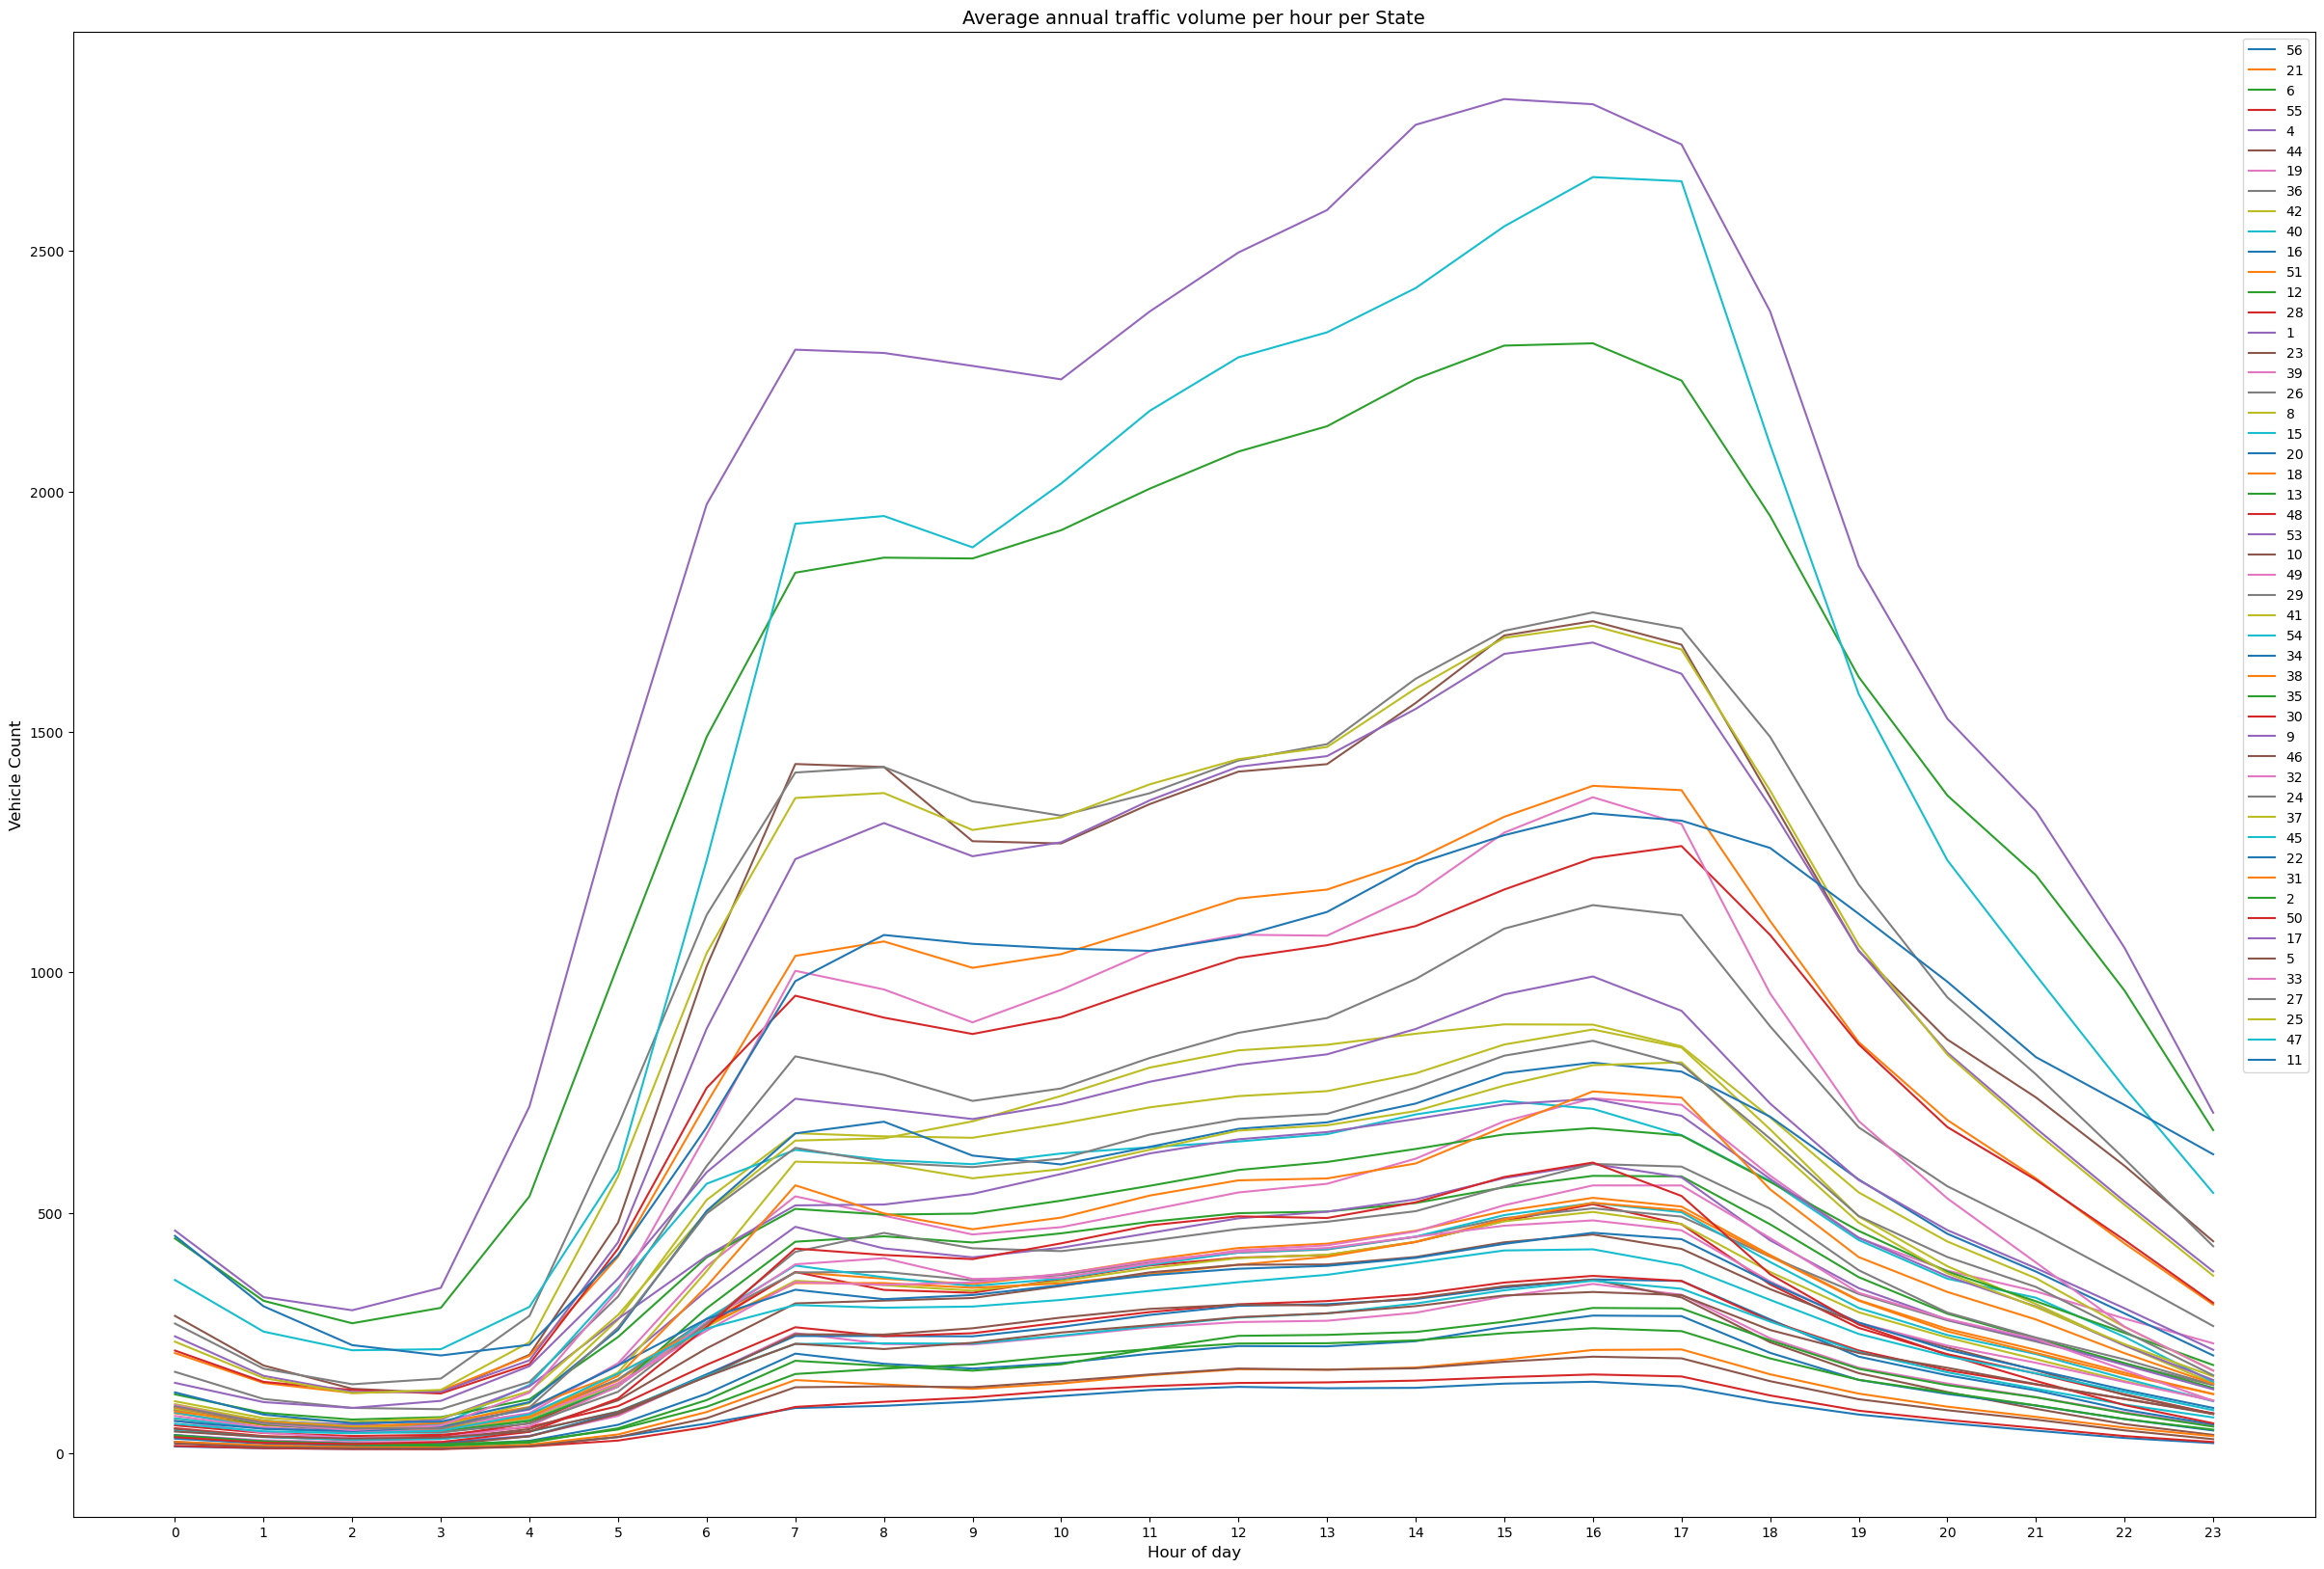

In [63]:
# Step 5. Visualise the average annual traffic volume per hour, over 24 hours for each state
fig = plt.figure(figsize = (30,20))

# line plot for each state
for state in stateCodes:
    plt.plot(range(0,24,1),avgTraffic[state],label='state')

# title
plt.title('Average annual traffic volume per hour per State',fontsize=14)
# axis labels
plt.xlabel('Hour of day',fontsize=12)
plt.ylabel('Vehicle Count', fontsize=12)
# x-axis ticks
plt.xticks(np.arange(0, 24, 1))
# legend
plt.legend(stateCodes)

plt.show()

#### Observation 1a - Trend of Traffic Volume per Hour across States
Across the states, the following observations can be made:
* majority of traffic flow occurs between 7am - 5pm, the trend is more pronounced for States experiencing higher traffic flow. 
* traffic flow starts to increase as early as 4am
* two traffic flow peaks in general, one 7am, with the other over 3pm - 5pm period

The peaks in traffic flow could be explained by the morning / evening rush hours.

#### Average traffic volume per hour

In [64]:
# Step 6 visualise distribution of traffic flow using bar plot
# DataFrame to hold the sum of average traffic volume for each hour
hourVol = pd.DataFrame(avgTraffic.sum(axis=1).sort_values(),
                        #index=['state'],
                        columns=['Total AvgTraffic per Hour'])

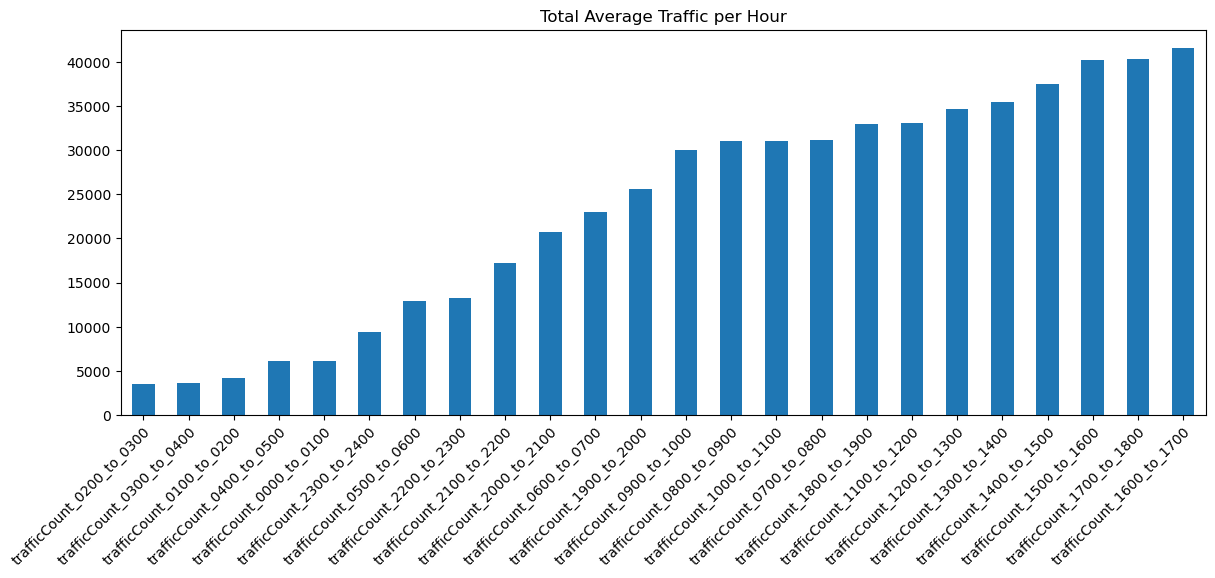

In [65]:
hourVol.plot.bar(figsize = (14,5),
                 title='Total Average Traffic per Hour',
                 legend='' )
plt.xticks(rotation=45,  horizontalalignment="right", rotation_mode='anchor')
plt.show()

#### Observation 1b - Hours with highest traffic volume
* Highest traffic volume experienced generally from 3pm to 5pm.

#### Average traffic volume per State

In [66]:
# Step 7 visualise traffic volume per state using bar plot
# DataFrame to hold the sum of average traffic volume for each state
stateVol = pd.DataFrame(avgTraffic.sum(axis=0).sort_values(),
                        columns=['TotalAvgTraffic per State'])

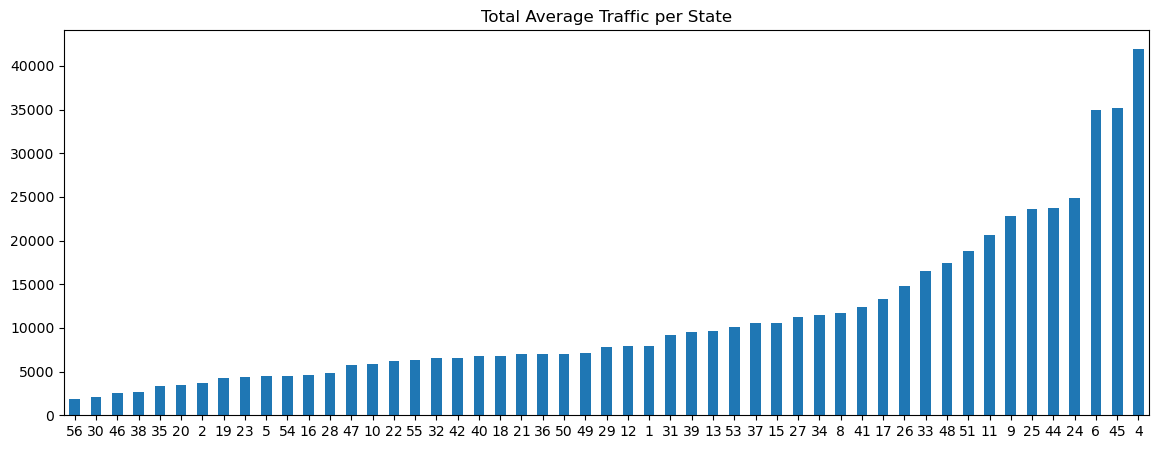

In [67]:
# Bar plot to visualise average traffic across states
stateVol.plot.bar(figsize = (14,5),
                  rot=0,
                  title='Total Average Traffic per State',
                  legend='' )
plt.show()

#### Observation 2
Reviewing the reference document, the state with the
* highest traffic flow on average is Arizona (state code 4)
* lowest  traffic flow on average is Wyoming (state code 56)

#### Average traffic volume per day of week
Since process of data processing is similar to that of reviewing the average traffic volume across the states, create a function to streamline process.

In [68]:
# Define function
def frame(colName):
    # create list of unique values for category of interest
    colValues = dfT[colName].unique()
    # create empty dataframe
    Frame = pd.DataFrame()
    # iterate through colValues
    for ele in colValues:
        Frame[ele] = np.mean(dfT[dfT[colName] == ele].loc[:,
                                                          'trafficCount_0000_to_0100':
                                                          'trafficCount_2300_to_2400'])
    return Frame

In [69]:
# Step 8. Get the average annual traffic volume per hour by day of week
avgTraffic_Day = frame('day_of_week')

In [70]:
# We should get a 24 x 7 dataframe
avgTraffic_Day.shape

(24, 7)

Since the process for visualising traffic volume per hour per daya of week would be similar to that of average traffic volume per State. Define a function to plot line plots.

In [71]:
# Define function for line plots
def Lines(y,x,colName,labelName,Title,df):
    
    fig = plt.figure(figsize = (x,y))

    # line plot for each day of week
    for ele in dfT[colName].unique():
        plt.plot(range(0,24,1),df[ele],label=labelName)

    # title
    plt.title(Title,fontsize=14)
    # axis labels
    plt.xlabel('Hour of day',fontsize=12)
    plt.ylabel('Vehicle Count', fontsize=12)
    # x-axis ticks
    plt.xticks(np.arange(0, 24, 1))
    # legend
    plt.legend(dfT[colName].unique(),bbox_to_anchor=(1.11,0.9))

    plt.show()

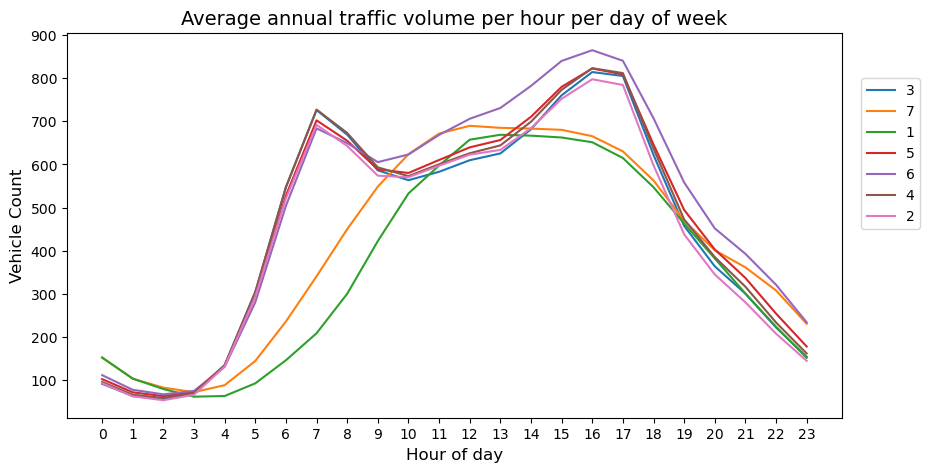

In [72]:
# Step 9. Visualise the average annual traffic volume per hour per day of week 
Lines(5,10,'day_of_week','day of week',
      'Average annual traffic volume per hour per day of week',
      avgTraffic_Day)

#### Observation 3a
* According to the reference document, Saturday is represented by 7, Sunday is represented by 1. 
* The traffic volume trends are different between weekdays and weekends (Sat and Sun); there is still traffic, though the typical rush hours to and from work is absent for weekends.

In [73]:
# Step 10 visualise traffic volume per day of week using bar plot
# DataFrame to hold the sum of average traffic volume for each state
dayVol = pd.DataFrame(avgTraffic_Day.sum(axis=0).sort_values(),
                        columns=['TotalAvgTraffic per dow'])

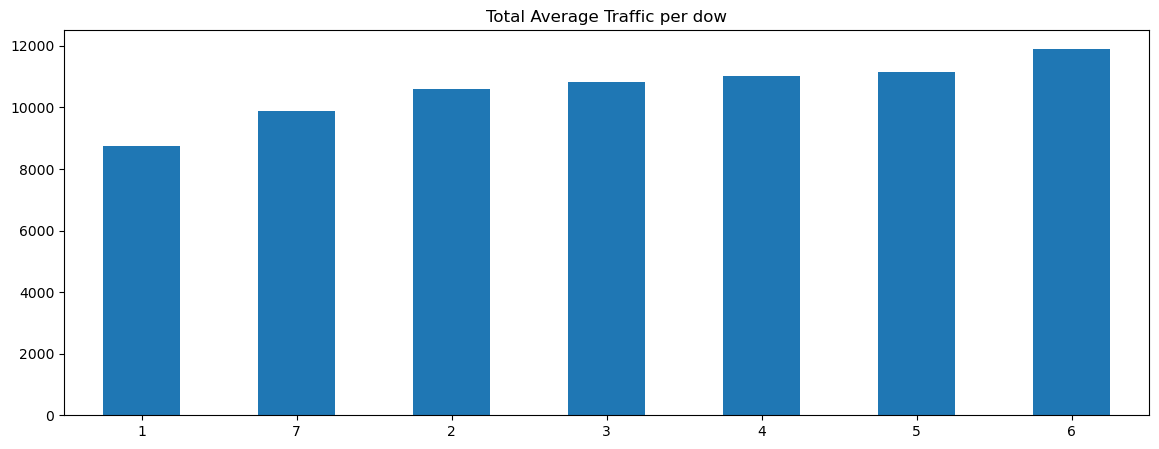

In [74]:
# Bar plot to visualise average traffic across day of week
dayVol.plot.bar(figsize = (14,5),
                rot=0,
                title='Total Average Traffic per dow',
                legend='' )
plt.show()

#### Observation 3b

* Weekends has a lower amount of traffic volume, especially Sunday. For Mondays to Thursdays (i.e. code 2 to 5), the traffic volume is fairly consistent. The higher traffic volume for Fridays (i.e. code 6), could be due to travel for social committments, visiting relatives across states.

#### Average traffic volume per month

In [75]:
# Step 11 Get the average annual traffic volume per hour by month of data
avgTraffic_Mnth = frame('month_of_data')

In [76]:
# We should get a 24 x 12 dataframe
avgTraffic_Mnth.shape

(24, 12)

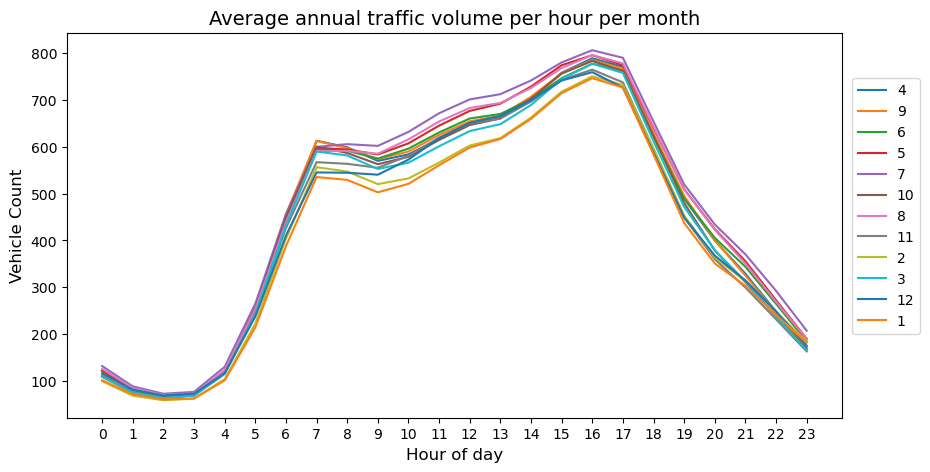

In [77]:
# Step 12. Visualise the average annual traffic volume per hour per month of data
Lines(5,10,'month_of_data','month',
      'Average annual traffic volume per hour per month',
      avgTraffic_Mnth)

#### Observation 4a
Across the months, the following observations can be made:
* generally consistent traffic volume trend across the months
* traffic flow starts to increase as early as 4am
* majority of traffic flow occurs between 7am - 5pm, with traffic volumne decreasing after 5pm
* months July and August seem to have the highest traffic volumes.

In [78]:
# Step 13 visualise traffic volume per day of week using bar plot
# DataFrame to hold the sum of average traffic volume for each state
MnthVol = pd.DataFrame(avgTraffic_Mnth.sum(axis=0).sort_values(),
                        columns=['TotalAvgTraffic per month'])

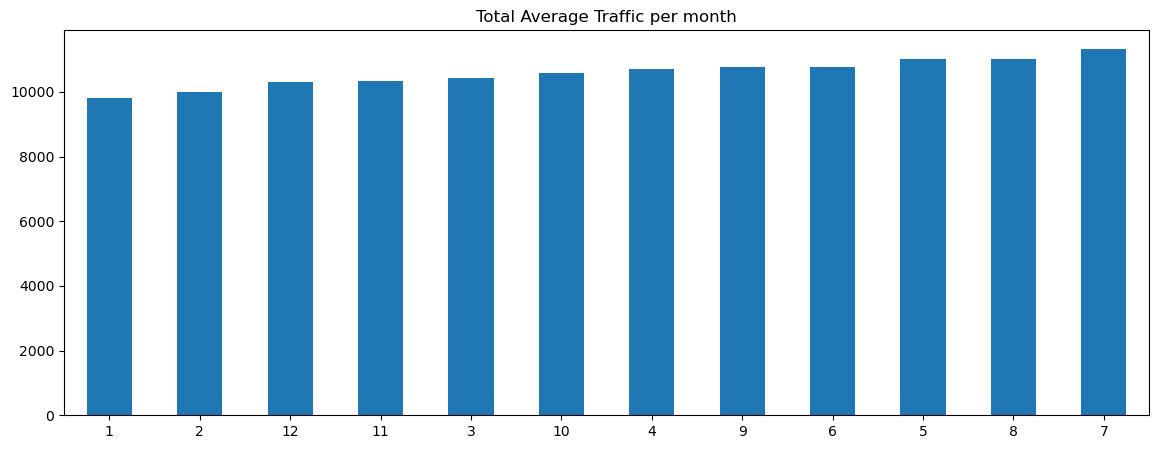

In [79]:
# Bar plot to visualise average traffic across months
MnthVol.plot.bar(figsize = (14,5),
                 rot=0,
                 title='Total Average Traffic per month',
                 legend='' )
plt.show()

#### Observation 4b
If we segregate the months into quarters Q1 (Jan Feb, Mar) and so on, it appears there is
lower traffic volume for Q1 and Q2 as compared to Q3 and Q4. We can try this approach during feature engineering process.

#### Average traffic volume per highway type (functional_classification_name)

In [80]:
# Step 14 Get a better sensing of the functional classifications
print('number of unique highway classes: ', len(dfT['functional_classification_name'].unique()))
print('These are: ', dfT['functional_classification_name'].unique())

number of unique highway classes:  12
These are:  ['Rural: Principal Arterial - Other'
 'Urban: Principal Arterial - Interstate' 'Rural: Minor Arterial'
 'Urban: Principal Arterial - Other Freeways or Expressways'
 'Urban: Principal Arterial - Other' 'Urban: Minor Arterial'
 'Rural: Principal Arterial - Interstate' 'Rural: Major Collector'
 'Rural: Minor Collector' 'Urban: Collector' 'Rural: Local System'
 'Urban: Local System']


In [81]:
# Step 15 Get the average annual traffic volume per hour by functional classes
avgTraffic_Hw = frame('functional_classification_name')

In [82]:
# We should get a 24 x 12 dataframe
avgTraffic_Hw.shape

(24, 12)

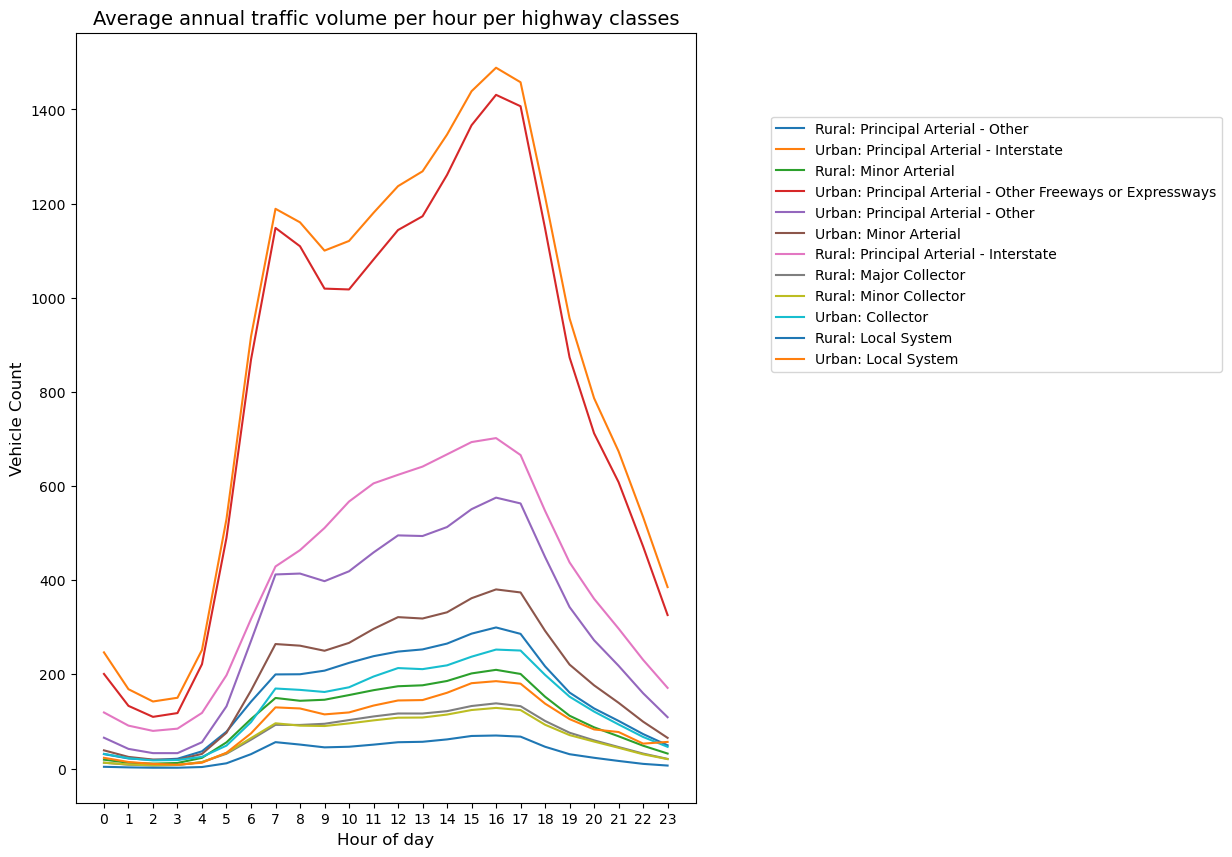

In [83]:
# Step 16. Visualise the average annual traffic volume per hour per highway classes
Lines(10,8,'functional_classification_name','highway classes',
      'Average annual traffic volume per hour per highway classes',
      avgTraffic_Hw)

In [84]:
# Step 17 visualise traffic volume per highway type using bar plot
# DataFrame to hold the sum of average traffic volume for each state
HwVol = pd.DataFrame(avgTraffic_Hw.sum(axis=0).sort_values(),
                        columns=['TotalAvgTraffic per highway type'])

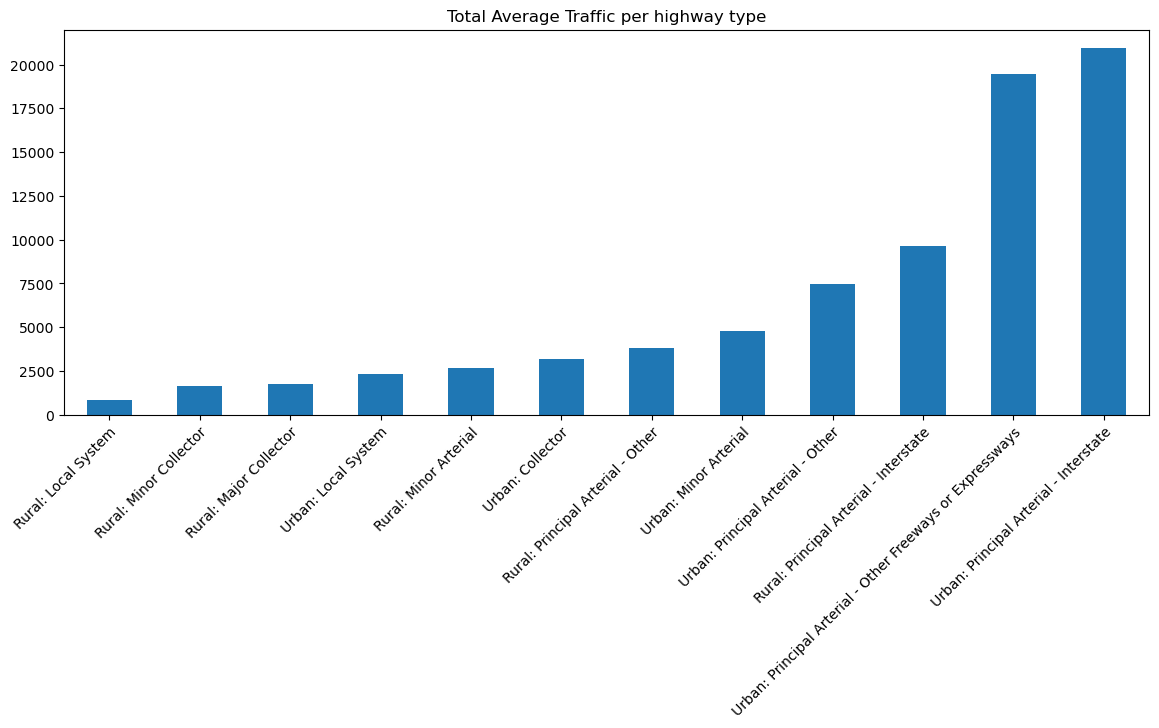

In [85]:
# Bar plot to visualise average traffic across months
HwVol.plot.bar(figsize = (14,5),
               title='Total Average Traffic per highway type',
               legend='' )
plt.xticks(rotation=45,  horizontalalignment="right", rotation_mode='anchor')
plt.show()

#### Observation 5
Distinct segregation in traffic volume by urban/ rural and arterial types. In general, there is higher traffic volume on 
* urban highways compared to rural highways
* arterial highways compared to non arterial highways

#### Reframing the Initial Problem Statement<a class="anchor" id="2.1"></a>
With the observations from the traffic dataset, we may define and scope the problem as "Predicting the traffic volume in Arizona (state with highest traffic volume on average) for the morning rush hour (7am-8am) - a regression problem.

However before this, we could look into clustering the station_ids by hourly traffic volume to see if there are any interesting patterns.

#### Clustering Station_Ids<a class="anchor" id="2.2"></a>


In [86]:
# Step 1 DataFrame of Arizona traffic from traffic dataframe 
dfArizona = dfT[dfT['fips_state_code'] == 4].copy()

In [87]:
# Review the dataframe
dfArizona.head(5)

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,fips_state_code,functional_classification,functional_classification_name,lane_of_travel,month_of_data,record_type,station_id,trafficCount_0000_to_0100,trafficCount_0100_to_0200,trafficCount_0200_to_0300,trafficCount_0300_to_0400,trafficCount_0400_to_0500,trafficCount_0500_to_0600,trafficCount_0600_to_0700,trafficCount_0700_to_0800,trafficCount_0800_to_0900,trafficCount_0900_to_1000,trafficCount_1000_to_1100,trafficCount_1100_to_1200,trafficCount_1200_to_1300,trafficCount_1300_to_1400,trafficCount_1400_to_1500,trafficCount_1500_to_1600,trafficCount_1600_to_1700,trafficCount_1700_to_1800,trafficCount_1800_to_1900,trafficCount_1900_to_2000,trafficCount_2000_to_2100,trafficCount_2100_to_2200,trafficCount_2200_to_2300,trafficCount_2300_to_2400,year_of_data
4,2015-05-23,23,7,3,East,4,4R,Rural: Minor Arterial,0,5,3,102210,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7,15
33,2015-11-16,16,2,1,North,4,3R,Rural: Principal Arterial - Other,0,11,3,100825,3,4,7,23,44,136,115,163,112,88,88,76,89,95,89,83,57,56,48,25,25,9,8,14,15
121,2015-11-12,12,5,7,West,4,2U,Urban: Principal Arterial - Other Freeways or ...,0,11,3,101384,641,432,379,419,885,2699,5098,5676,5339,5741,4174,4255,4365,4649,4830,4272,3956,3821,3668,3146,2620,2072,1860,1124,15
127,2015-12-17,17,5,3,East,4,5R,Rural: Major Collector,0,12,3,100783,13,9,7,9,21,53,80,94,104,130,144,142,154,193,205,238,213,163,136,97,65,63,39,35,15
197,2015-12-16,16,4,7,West,4,1R,Rural: Principal Arterial - Interstate,0,12,3,100509,90,107,95,108,117,240,322,313,323,350,377,443,464,474,444,471,443,416,313,297,250,227,206,132,15


In [88]:
# Shape of dataframe
dfArizona.shape

(133421, 37)

In [89]:
# summary statistics
dfArizona.describe()

,day_of_data,day_of_week,direction_of_travel,fips_state_code,lane_of_travel,month_of_data,record_type,trafficCount_0000_to_0100,trafficCount_0100_to_0200,trafficCount_0200_to_0300,trafficCount_0300_to_0400,trafficCount_0400_to_0500,trafficCount_0500_to_0600,trafficCount_0600_to_0700,trafficCount_0700_to_0800,trafficCount_0800_to_0900,trafficCount_0900_to_1000,trafficCount_1000_to_1100,trafficCount_1100_to_1200,trafficCount_1200_to_1300,trafficCount_1300_to_1400,trafficCount_1400_to_1500,trafficCount_1500_to_1600,trafficCount_1600_to_1700,trafficCount_1700_to_1800,trafficCount_1800_to_1900,trafficCount_1900_to_2000,trafficCount_2000_to_2100,trafficCount_2100_to_2200,trafficCount_2200_to_2300,trafficCount_2300_to_2400,year_of_data
count,133421.000000,133421.000000,133421.000000,133421.0,133421.0,133421.000000,133421.0,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.000000,133421.0
mean,15.709319,4.010456,4.142744,4.0,0.0,6.557776,3.0,463.013131,324.543573,297.267087,343.885033,721.043501,1377.169666,1972.994828,2294.565233,2287.692635,2260.834936,2232.827269,2374.042317,2496.560047,2584.801493,2762.128331,2815.635057,2804.882410,2721.395073,2374.309989,1844.744163,1527.215866,1335.155808,1050.724204,707.918604,15.0
std,8.749107,1.998771,2.233000,0.0,0.0,3.506283,0.0,553.627794,396.996279,370.951811,432.583493,1015.131497,1832.254899,2380.129567,2553.852534,2413.004197,2274.933605,2150.291554,2282.967207,2401.822882,2507.143368,2707.010013,2746.242298,2732.968422,2672.174599,2375.315670,1877.737771,1575.391058,1425.076320,1174.895943,827.560730,0.0
min,1.000000,1.000000,1.000000,4.0,0.0,1.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.0
25%,8.000000,2.000000,3.000000,4.0,0.0,3.000000,3.0,33.000000,23.000000,20.000000,23.000000,39.000000,76.000000,129.000000,181.000000,221.000000,263.000000,298.000000,315.000000,332.000000,333.000000,330.000000,329.000000,319.000000,290.000000,231.000000,179.000000,142.000000,110.000000,78.000000,51.000000,15.0
50%,16.000000,4.000000,3.000000,4.0,0.0,7.000000,3.0,251.000000,177.000000,160.000000,185.000000,297.000000,510.000000,838.000000,1142.000000,1321.000000,1399.000000,1493.000000,1548.000000,1597.000000,1631.000000,1732.000000,1804.000000,1827.000000,1753.000000,1452.000000,1101.000000,895.000000,721.000000,542.000000,372.000000,15.0
75%,23.000000,6.000000,7.000000,4.0,0.0,10.000000,3.0,732.000000,497.000000,457.000000,517.000000,1020.000000,2097.000000,3368.000000,4123.000000,4061.000000,3937.000000,3917.000000,4201.000000,4441.000000,4591.000000,4945.000000,5040.000000,5005.000000,4905.000000,4313.000000,3309.000000,2736.000000,2378.000000,1807.000000,1159.000000,15.0
max,31.000000,7.000000,7.000000,4.0,0.0,12.000000,3.0,9270.000000,9270.000000,9270.000000,3799.000000,7155.000000,11031.000000,14372.000000,14342.000000,13885.000000,12762.000000,11262.000000,11558.000000,11744.000000,12416.000000,12197.000000,11654.000000,12006.000000,12045.000000,11260.000000,9011.000000,7981.000000,8958.000000,7812.000000,6480.000000,15.0


In [90]:
# Step 2 Check number of unique station_ids in Arizona dataframe
len(dfArizona['station_id'].unique())

275

Dummy encoding or onehot encoding these many station_ids should not be an issue for linear-type models (which deals gracefully with many features). However, it could be an issue for tree-type models or distance metric models. We could opt to use the geo coordinates in place of station_id. We can extract the geo-coordinates (latitude & longitude) for corresponding station_ids from station data. Something to keep in mind if we are to consider station_id in modelling.

#### Retrieve Lat & Lon for Station_Ids


In [91]:
# Step 1 Get a copy of Arizona station_ids from station dataframe
dfSA = dfS.loc[dfS['fips_state_code'] ==4].copy()
dfSA_ = dfSA[['direction_of_travel_name',
              'functional_classification',
              'latitude',
              'longitude',
              'station_id']].copy()

In [92]:
# Check shape of dataframe
dfSA_.shape

(598, 5)

In [93]:
# Step 2 Check number of unique station_ids in dataframe
len(dfSA_['station_id'].unique())

309

It appears there are duplicated station_ids in the dataframe, which we need to remove before joining the two dataframes together.

In [94]:
# Step 3 Drop duplicates
dfSA_nodup = dfSA_.drop_duplicates(subset=['station_id'],keep='first')

In [95]:
# Check shape - expecting rows to equal number of unique station_ids
dfSA_nodup.shape[0]

309

In [96]:
# Step 5 Join the two dataframes on station_id
dfArizona_M = pd.merge(dfArizona, dfSA_nodup, on="station_id")

In [97]:
# Check shape - expect same row count as Arizona dataframe
dfArizona_M.shape

(133421, 41)

In [98]:
# Get the columns we need for this section into a dataframe
colNeed = ['station_id', 'latitude', 'longitude',
          'trafficCount_0000_to_0100', 'trafficCount_0100_to_0200',
           'trafficCount_0200_to_0300', 'trafficCount_0300_to_0400',
           'trafficCount_0400_to_0500', 'trafficCount_0500_to_0600',
           'trafficCount_0600_to_0700', 'trafficCount_0700_to_0800',
           'trafficCount_0800_to_0900', 'trafficCount_0900_to_1000',
           'trafficCount_1000_to_1100', 'trafficCount_1100_to_1200',
           'trafficCount_1200_to_1300', 'trafficCount_1300_to_1400',
           'trafficCount_1400_to_1500', 'trafficCount_1500_to_1600',
           'trafficCount_1600_to_1700', 'trafficCount_1700_to_1800',
           'trafficCount_1800_to_1900', 'trafficCount_1900_to_2000',
           'trafficCount_2000_to_2100', 'trafficCount_2100_to_2200',
           'trafficCount_2200_to_2300', 'trafficCount_2300_to_2400',
          ]

In [99]:
df_station_locn = dfArizona_M[colNeed ].copy()

In [100]:
df_station_locn

,station_id,latitude,longitude,trafficCount_0000_to_0100,trafficCount_0100_to_0200,trafficCount_0200_to_0300,trafficCount_0300_to_0400,trafficCount_0400_to_0500,trafficCount_0500_to_0600,trafficCount_0600_to_0700,trafficCount_0700_to_0800,trafficCount_0800_to_0900,trafficCount_0900_to_1000,trafficCount_1000_to_1100,trafficCount_1100_to_1200,trafficCount_1200_to_1300,trafficCount_1300_to_1400,trafficCount_1400_to_1500,trafficCount_1500_to_1600,trafficCount_1600_to_1700,trafficCount_1700_to_1800,trafficCount_1800_to_1900,trafficCount_1900_to_2000,trafficCount_2000_to_2100,trafficCount_2100_to_2200,trafficCount_2200_to_2300,trafficCount_2300_to_2400
0,102210,34.036747,109.186545,6,4,2,3,1,10,17,52,64,68,82,96,99,87,87,83,61,55,35,29,21,23,9,7
1,102210,34.036747,109.186545,3,0,4,4,12,13,40,38,29,31,49,61,42,39,42,43,36,33,25,17,10,6,3,0
2,102210,34.036747,109.186545,1,0,0,1,1,7,26,57,28,36,35,37,44,44,50,38,45,53,20,21,22,8,7,4
3,102210,34.036747,109.186545,0,1,0,2,0,9,33,19,16,32,33,32,35,30,23,54,42,26,20,12,15,5,2,4
4,102210,34.036747,109.186545,0,1,0,0,1,9,9,26,26,37,47,50,68,48,41,48,44,44,24,23,8,7,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133416,100079,33.429200,112.603800,235,226,218,232,642,1108,1288,1100,1453,1814,1646,1342,1569,1480,1753,1416,1500,1479,1494,1087,793,509,404,283
133417,100079,33.429200,112.603800,195,128,123,134,460,736,636,655,541,776,856,948,1020,1245,1094,950,1075,1017,746,631,563,502,364,308
133418,100079,33.429200,112.603800,257,209,202,232,832,1067,861,730,750,911,971,935,934,1058,995,997,1080,1149,935,737,463,400,446,365
133419,100079,33.429200,112.603800,316,223,219,270,738,1307,1269,1144,979,1208,1246,1413,1399,1426,1382,1235,1407,1268,889,955,847,692,482,377


In [101]:
df_station_locn.columns

Index(['station_id', 'latitude', 'longitude', 'trafficCount_0000_to_0100',
       'trafficCount_0100_to_0200', 'trafficCount_0200_to_0300',
       'trafficCount_0300_to_0400', 'trafficCount_0400_to_0500',
       'trafficCount_0500_to_0600', 'trafficCount_0600_to_0700',
       'trafficCount_0700_to_0800', 'trafficCount_0800_to_0900',
       'trafficCount_0900_to_1000', 'trafficCount_1000_to_1100',
       'trafficCount_1100_to_1200', 'trafficCount_1200_to_1300',
       'trafficCount_1300_to_1400', 'trafficCount_1400_to_1500',
       'trafficCount_1500_to_1600', 'trafficCount_1600_to_1700',
       'trafficCount_1700_to_1800', 'trafficCount_1800_to_1900',
       'trafficCount_1900_to_2000', 'trafficCount_2000_to_2100',
       'trafficCount_2100_to_2200', 'trafficCount_2200_to_2300',
       'trafficCount_2300_to_2400'],
      dtype='object')

In [102]:
# Aggregate the traffic volume per hour by station ids
df_statn_agg = df_station_locn.groupby(
    ['station_id', 'latitude', 'longitude'],as_index=False
).agg(
    {
        'trafficCount_0000_to_0100':'mean', 'trafficCount_0200_to_0300':'mean',
        'trafficCount_0300_to_0400':'mean', 'trafficCount_0400_to_0500':'mean',
        'trafficCount_0500_to_0600':'mean', 'trafficCount_0600_to_0700':'mean',
        'trafficCount_0700_to_0800':'mean', 'trafficCount_0800_to_0900':'mean',
        'trafficCount_0900_to_1000':'mean', 'trafficCount_1000_to_1100':'mean',
        'trafficCount_1100_to_1200':'mean', 'trafficCount_1200_to_1300':'mean',
        'trafficCount_1300_to_1400':'mean', 'trafficCount_1400_to_1500':'mean',
        'trafficCount_1500_to_1600':'mean', 'trafficCount_1600_to_1700':'mean',
        'trafficCount_1700_to_1800':'mean', 'trafficCount_1800_to_1900':'mean',
        'trafficCount_1900_to_2000':'mean', 'trafficCount_2000_to_2100':'mean',
        'trafficCount_2100_to_2200':'mean', 'trafficCount_2200_to_2300':'mean',
        'trafficCount_2300_to_2400':'mean'
    }
)

In [103]:
df_statn_agg

,station_id,latitude,longitude,trafficCount_0000_to_0100,trafficCount_0200_to_0300,trafficCount_0300_to_0400,trafficCount_0400_to_0500,trafficCount_0500_to_0600,trafficCount_0600_to_0700,trafficCount_0700_to_0800,trafficCount_0800_to_0900,trafficCount_0900_to_1000,trafficCount_1000_to_1100,trafficCount_1100_to_1200,trafficCount_1200_to_1300,trafficCount_1300_to_1400,trafficCount_1400_to_1500,trafficCount_1500_to_1600,trafficCount_1600_to_1700,trafficCount_1700_to_1800,trafficCount_1800_to_1900,trafficCount_1900_to_2000,trafficCount_2000_to_2100,trafficCount_2100_to_2200,trafficCount_2200_to_2300,trafficCount_2300_to_2400
0,100002,32.704399,114.610406,176.508876,162.164201,177.730769,221.732249,312.196746,391.791420,568.420118,602.957101,623.930473,659.460059,732.849112,791.238166,809.568047,800.871302,799.510355,781.424556,746.982249,593.809172,474.195266,412.014793,344.525148,277.610947,207.301775
1,100007,32.670332,114.431198,111.882653,77.914966,90.253401,143.772109,264.965986,344.399660,485.386054,575.297619,643.403061,705.620748,769.734694,810.544218,822.714286,793.515306,778.144558,751.052721,679.287415,544.505102,425.804422,352.508503,286.253401,202.836735,144.032313
2,100023,32.919662,112.646475,40.428144,30.752994,29.878743,37.573353,57.657186,90.353293,127.365269,153.962575,183.893713,207.348802,214.136228,209.145210,212.808383,227.070359,237.785928,234.208084,212.362275,176.323353,137.739521,106.679641,83.872754,64.862275,51.571856
3,100064,33.608036,114.489793,281.147564,204.187679,184.345272,185.232092,236.650430,281.071633,375.755014,479.137536,564.385387,662.946991,764.865330,813.613181,837.299427,847.608883,813.828080,767.130372,692.210602,601.107450,518.808023,468.851003,423.889685,375.371060,323.789398
4,100071,33.615022,113.657750,281.833333,202.778736,190.656609,195.461207,229.863506,296.445402,378.709770,454.265805,552.524425,668.015805,718.916667,727.041667,744.675287,769.418103,761.011494,727.352011,680.122126,603.346264,541.260057,471.096264,403.991379,366.227011,326.797414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,102238,35.193543,109.437315,3.576271,2.152542,2.663438,6.142857,11.317191,18.014528,21.450363,23.961259,28.961259,30.883777,31.205811,30.857143,31.147700,31.099274,31.677966,31.440678,29.539952,22.707022,18.801453,14.566586,11.191283,7.779661,5.588378
271,102255,36.995992,112.530322,10.048193,4.560241,6.847390,17.058233,33.793173,66.540161,103.220884,116.389558,129.502008,140.594378,152.090361,157.941767,162.096386,164.373494,167.325301,172.216867,152.935743,117.339357,87.740964,65.104418,46.899598,31.056225,17.849398
272,102287,36.814863,109.890247,13.726449,8.000000,9.733696,17.092391,31.992754,47.503623,56.105072,75.188406,92.822464,107.702899,114.599638,117.126812,116.184783,114.545290,113.347826,109.255435,95.664855,78.168478,63.047101,49.849638,38.943841,28.094203,19.621377
273,102288,32.495072,114.636187,17.759259,15.814815,13.518519,14.629630,42.092593,51.129630,89.740741,66.722222,57.537037,55.333333,60.574074,63.870370,73.870370,82.296296,105.370370,112.277778,111.111111,86.148148,69.037037,56.611111,54.888889,35.870370,29.740741


geopy is a Python client that facilitates the identification of the coordinates of addresses, cities, countries, and landmarks through third-party geocoders and other data sources. Use geopy to get the latitude and longitude of Arizona.

In [104]:
# Import libraries
from geopy.geocoders import Nominatim 
import folium

In [105]:
# Define and name user_Agent as "Arizona".  
place = 'Arizona'
geolocator = Nominatim(user_agent="Arizona")
location = geolocator.geocode(place)
Arizona_lat = location.latitude
Arizona_lon = location.longitude
print(f"Coordinates of {place} are {Arizona_lat}, {Arizona_lon}")

Coordinates of Arizona are 34.395342, -111.763275


Arizona longitude is negative. We need to convert the longitude signs in the dataframe accordingly. Otherwise, the mapping would be errornous.

In [106]:
# Sign conversion for longitude
df_statn_agg['longitude'] = df_statn_agg['longitude']*-1

In [107]:
# Visualize the station ids in Arizona
map_Ari = folium.Map(location = [Arizona_lat, Arizona_lon], zoom_start = 6)

# Add markers
for lat, lng, label in zip(df_statn_agg['latitude'],
                           df_statn_agg['longitude'],
                           df_statn_agg['station_id']):
    folium.RegularPolygonMarker([lat, lng],
                                popup=label,
                                radius=12,
                                color='purple',
                                fill_color='blue',
                                fill_opacity=0.7).add_to(map_Ari) 
# display map
map_Ari

We use K-means algorithm to cluster the station ids based on average hourly traffic volume.

The inituition behind K-means is clustering data points or observations into specified clusters, such that the total within-cluster Sum of Squared Errors is minimum.

The Squared Error for each point is the square of the distance of the point from its predicted cluster center (centroid).

To determine the optimum number of k for clustering, there are several methods, such as the Elbow method and the Silhouette method.

**Elbow Method**

In this approach, the approach is to calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. If the dataset is not well clustered (i.e. overlapping clusters), the elbow from the elbow method may potentially not be distinct.

**Silhouette Method**

The Silhouette method measures the similarity of a point to its own cluster, compared to other clusters. The range of the Silhouette coefficients is between positive one and negative one.

A positive coefficient tending close to positive one indicates the particular point is assigned in the ideal cluster. It also implies point is as practically distanced from the neighboring clusters as possible. A coefficient of zero indicates that the particular point is on or very close to the decision boundary between two neighboring clusters. A negative coefficient indicate that the point has been assigned to the wrong cluster.

#### Use Silhouette method to discover optimum k

In [108]:
dfStatn_cluster = df_statn_agg.drop(['station_id','latitude','longitude'],axis=1)

In [109]:
# Import libraries
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

For n_clusters: 2, avg silhouette score: 0.708
For n_clusters: 3, avg silhouette score: 0.629
For n_clusters: 4, avg silhouette score: 0.609
For n_clusters: 5, avg silhouette score: 0.569
For n_clusters: 6, avg silhouette score: 0.545
For n_clusters: 7, avg silhouette score: 0.473
For n_clusters: 8, avg silhouette score: 0.439
For n_clusters: 9, avg silhouette score: 0.448
For n_clusters: 10, avg silhouette score: 0.435


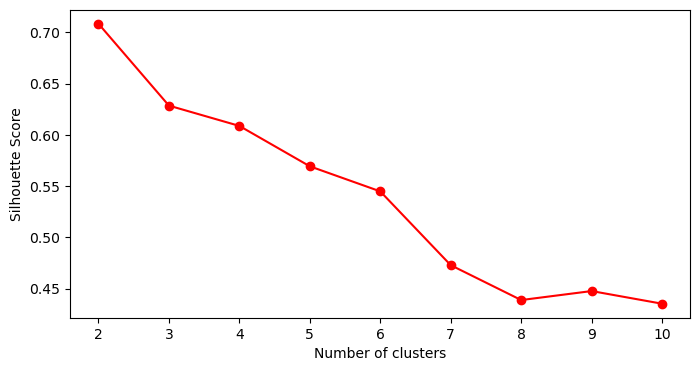

In [111]:
kmax=10
scores=[]
# dissimilarity would not be defined for a single cluster, 
# thus, minimum number of clusters should be 2
for k in range(2,kmax+1):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=42).fit(dfStatn_cluster)
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(dfStatn_cluster, cluster_labels)
    scores.append(silhouette_avg)
    print(f'For n_clusters: {k}, avg silhouette score: {silhouette_avg:.3f}')

plt.figure(figsize=(8,4))
plt.plot(np.arange(2, kmax+1), scores, 'ro-')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.xticks(np.arange(2, kmax+1))
plt.show()    

The optimum k is 2. Run k-means to cluster the station ids into 2 clusters.

In [112]:
# set number of clusters
kclusters = 2

# run k-means clustering
kmeans = KMeans(init='k-means++', n_clusters=kclusters, random_state=42).fit(dfStatn_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [113]:
# create a new dataframe that includes the cluster
df_statn_agg.insert(0, 'Cluster Labels', kmeans.labels_)

In [114]:
# Review the data frame
df_statn_agg

,Cluster Labels,station_id,latitude,longitude,trafficCount_0000_to_0100,trafficCount_0200_to_0300,trafficCount_0300_to_0400,trafficCount_0400_to_0500,trafficCount_0500_to_0600,trafficCount_0600_to_0700,trafficCount_0700_to_0800,trafficCount_0800_to_0900,trafficCount_0900_to_1000,trafficCount_1000_to_1100,trafficCount_1100_to_1200,trafficCount_1200_to_1300,trafficCount_1300_to_1400,trafficCount_1400_to_1500,trafficCount_1500_to_1600,trafficCount_1600_to_1700,trafficCount_1700_to_1800,trafficCount_1800_to_1900,trafficCount_1900_to_2000,trafficCount_2000_to_2100,trafficCount_2100_to_2200,trafficCount_2200_to_2300,trafficCount_2300_to_2400
0,0,100002,32.704399,-114.610406,176.508876,162.164201,177.730769,221.732249,312.196746,391.791420,568.420118,602.957101,623.930473,659.460059,732.849112,791.238166,809.568047,800.871302,799.510355,781.424556,746.982249,593.809172,474.195266,412.014793,344.525148,277.610947,207.301775
1,0,100007,32.670332,-114.431198,111.882653,77.914966,90.253401,143.772109,264.965986,344.399660,485.386054,575.297619,643.403061,705.620748,769.734694,810.544218,822.714286,793.515306,778.144558,751.052721,679.287415,544.505102,425.804422,352.508503,286.253401,202.836735,144.032313
2,0,100023,32.919662,-112.646475,40.428144,30.752994,29.878743,37.573353,57.657186,90.353293,127.365269,153.962575,183.893713,207.348802,214.136228,209.145210,212.808383,227.070359,237.785928,234.208084,212.362275,176.323353,137.739521,106.679641,83.872754,64.862275,51.571856
3,0,100064,33.608036,-114.489793,281.147564,204.187679,184.345272,185.232092,236.650430,281.071633,375.755014,479.137536,564.385387,662.946991,764.865330,813.613181,837.299427,847.608883,813.828080,767.130372,692.210602,601.107450,518.808023,468.851003,423.889685,375.371060,323.789398
4,0,100071,33.615022,-113.657750,281.833333,202.778736,190.656609,195.461207,229.863506,296.445402,378.709770,454.265805,552.524425,668.015805,718.916667,727.041667,744.675287,769.418103,761.011494,727.352011,680.122126,603.346264,541.260057,471.096264,403.991379,366.227011,326.797414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0,102238,35.193543,-109.437315,3.576271,2.152542,2.663438,6.142857,11.317191,18.014528,21.450363,23.961259,28.961259,30.883777,31.205811,30.857143,31.147700,31.099274,31.677966,31.440678,29.539952,22.707022,18.801453,14.566586,11.191283,7.779661,5.588378
271,0,102255,36.995992,-112.530322,10.048193,4.560241,6.847390,17.058233,33.793173,66.540161,103.220884,116.389558,129.502008,140.594378,152.090361,157.941767,162.096386,164.373494,167.325301,172.216867,152.935743,117.339357,87.740964,65.104418,46.899598,31.056225,17.849398
272,0,102287,36.814863,-109.890247,13.726449,8.000000,9.733696,17.092391,31.992754,47.503623,56.105072,75.188406,92.822464,107.702899,114.599638,117.126812,116.184783,114.545290,113.347826,109.255435,95.664855,78.168478,63.047101,49.849638,38.943841,28.094203,19.621377
273,0,102288,32.495072,-114.636187,17.759259,15.814815,13.518519,14.629630,42.092593,51.129630,89.740741,66.722222,57.537037,55.333333,60.574074,63.870370,73.870370,82.296296,105.370370,112.277778,111.111111,86.148148,69.037037,56.611111,54.888889,35.870370,29.740741


In [115]:
# visualize the clustered station ids
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location = [Arizona_lat, Arizona_lon], zoom_start = 8)

# set the color scheme for the clusters
x = np.arange(kclusters)
ys = [i+ x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.tab10(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# Add markers
markers_colors = []
for lat, lng, poi, cluster in zip(df_statn_agg['latitude'],
                                  df_statn_agg['longitude'],
                                  df_statn_agg['station_id'],
                                  df_statn_agg['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster))
    folium.CircleMarker([lat, lng],
                        popup=label,
                        radius=12,
                        color=rainbow[cluster-1],
                        fill=True,
                        fill_color=rainbow[cluster-1],
                        fill_opacity=0.7).add_to(map_clusters) 
# display map
map_clusters

#### Examine the clusters
We examine each cluster and see if we are able to derive further insights that help us distinguish each cluster. 

In [116]:
df_statn_agg.loc[df_statn_agg['Cluster Labels'] == 0].describe()

,Cluster Labels,latitude,longitude,trafficCount_0000_to_0100,trafficCount_0200_to_0300,trafficCount_0300_to_0400,trafficCount_0400_to_0500,trafficCount_0500_to_0600,trafficCount_0600_to_0700,trafficCount_0700_to_0800,trafficCount_0800_to_0900,trafficCount_0900_to_1000,trafficCount_1000_to_1100,trafficCount_1100_to_1200,trafficCount_1200_to_1300,trafficCount_1300_to_1400,trafficCount_1400_to_1500,trafficCount_1500_to_1600,trafficCount_1600_to_1700,trafficCount_1700_to_1800,trafficCount_1800_to_1900,trafficCount_1900_to_2000,trafficCount_2000_to_2100,trafficCount_2100_to_2200,trafficCount_2200_to_2300,trafficCount_2300_to_2400
count,152.0,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.0,33.765047,-111.681189,104.060596,70.543013,79.447585,139.093335,268.129827,415.558691,547.059651,553.142351,569.237109,604.555012,636.259827,656.815628,670.632488,705.334117,741.374424,755.773750,717.703665,572.690050,431.153589,346.816436,281.897700,214.261453,147.716141
std,0.0,1.260687,1.405215,118.988097,84.401970,95.080720,176.860777,352.532888,542.396333,667.589431,623.759128,597.287597,617.917960,646.590195,668.619068,685.529948,737.675406,797.923326,834.580838,810.556221,651.365661,479.742769,388.314310,320.772523,246.892328,169.309534
min,0.0,31.361054,-114.707907,0.535604,0.417957,0.621234,2.007299,3.650155,3.504644,6.817337,7.832817,10.034056,11.201238,11.613003,12.126935,12.724458,12.393189,12.597523,12.278638,10.517028,7.996904,5.504644,3.975232,2.458204,1.362229,0.801858
25%,0.0,32.936628,-112.377621,10.932120,7.085317,7.899872,14.623705,32.461112,58.943307,89.992795,91.310989,98.802014,109.457504,114.147468,115.652557,116.550506,134.271469,134.132119,138.320061,123.353100,89.796555,68.745417,52.786014,39.995424,27.467231,17.666605
50%,0.0,33.688136,-111.778415,51.403773,31.778601,40.475230,71.337846,131.268071,200.513510,309.566573,332.798743,376.810151,425.201564,448.854855,474.956687,471.013263,503.630577,518.500330,497.507380,456.462525,356.654924,272.249199,212.285363,178.463358,129.633598,78.196166
75%,0.0,34.711090,-110.749702,151.322605,109.209546,115.240352,188.558010,303.424498,475.724161,669.914837,712.353747,736.342910,826.052493,859.388908,898.289323,903.414855,934.385727,982.614565,990.150158,933.482108,712.505712,557.660796,466.817959,376.897222,297.438136,210.277273
max,0.0,36.995992,-109.049250,559.665230,415.051724,512.658046,1020.916667,1687.932773,2484.050420,2911.340336,2777.558824,2406.172269,2351.898329,2423.967967,2562.789916,2651.852941,2810.811419,3412.250000,3878.312500,3767.687500,2861.187500,2015.493080,1676.437716,1380.612457,1039.709343,741.354885


In [117]:
df_statn_agg.loc[df_statn_agg['Cluster Labels'] == 1].describe()

,Cluster Labels,latitude,longitude,trafficCount_0000_to_0100,trafficCount_0200_to_0300,trafficCount_0300_to_0400,trafficCount_0400_to_0500,trafficCount_0500_to_0600,trafficCount_0600_to_0700,trafficCount_0700_to_0800,trafficCount_0800_to_0900,trafficCount_0900_to_1000,trafficCount_1000_to_1100,trafficCount_1100_to_1200,trafficCount_1200_to_1300,trafficCount_1300_to_1400,trafficCount_1400_to_1500,trafficCount_1500_to_1600,trafficCount_1600_to_1700,trafficCount_1700_to_1800,trafficCount_1800_to_1900,trafficCount_1900_to_2000,trafficCount_2000_to_2100,trafficCount_2100_to_2200,trafficCount_2200_to_2300,trafficCount_2300_to_2400
count,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,1.0,33.463560,-111.981829,904.798990,568.575904,654.933396,1400.891602,2691.480219,3906.213934,4500.180665,4487.312909,4406.483461,4312.816449,4592.451673,4837.613111,5012.742750,5361.250972,5461.070491,5423.482567,5285.502292,4676.853591,3632.832378,3007.106431,2647.634117,2088.907090,1398.445865
std,0.0,0.190347,0.182219,399.236798,308.457645,380.527636,795.811229,1132.481870,1148.592151,1155.523979,1155.347833,1210.676388,1190.884979,1270.048719,1342.108872,1397.393213,1459.618379,1400.093002,1349.057859,1308.498076,1233.423062,1091.329046,965.919133,897.633063,772.328894,578.264556
min,1.0,32.184870,-112.368099,331.852941,171.344444,203.544444,266.297872,394.010638,972.920213,1940.335106,2416.133333,2377.844828,2221.620295,2464.502455,2626.040917,2669.031097,2886.435352,2901.936330,2742.940075,2588.883838,2404.970540,1783.877250,1468.854337,1266.000000,852.444444,530.100000
25%,1.0,33.402076,-112.088403,618.110426,344.366191,349.773513,795.011853,1803.122667,3112.078220,3740.478502,3731.369878,3544.539781,3453.685143,3661.923724,3827.644131,3932.314013,4186.343682,4358.436603,4381.544258,4302.189794,3712.165488,2769.139140,2166.041437,1902.039588,1489.149636,962.784517
50%,1.0,33.460104,-112.003423,841.825077,487.582712,551.850000,1269.267802,2539.117450,3840.673640,4473.584475,4443.255034,4280.549699,4117.587859,4430.069725,4724.272277,4854.172414,5154.255034,5435.600000,5400.269578,5288.824962,4635.063253,3555.916667,2914.509972,2521.212281,1986.241379,1307.852459
75%,1.0,33.543956,-111.893081,1152.206266,706.068171,826.355632,1741.803614,3250.467063,4482.619699,5154.719528,5156.294329,5022.797417,5039.676290,5409.543694,5691.445694,5812.568516,6218.767193,6377.506859,6327.396422,6172.434205,5501.175473,4231.196384,3555.769699,3170.259260,2562.490828,1782.093206
max,1.0,33.791453,-110.984200,1964.922591,1512.453397,1824.451817,4136.149847,6802.850153,7958.770312,8595.423437,8461.160938,8356.756250,8056.411765,8566.685121,9004.596886,9360.229687,10098.435938,9828.982813,9501.017187,9209.123438,8324.595312,6747.249135,5785.809689,5259.077855,4351.974048,3049.615917


#### Observation 6
This is interesting. In general, cluster 1 station ids tend to have higher average traffic volume compared to those in cluster 0. Navigating the generated folium map above, we find that cluster 1 has the Phoenix Sky Harbor International Airport at its center. It is expected that Highways in close proximities to transport hubs (e.g. ports, airports) would see more traffic volume.

____

#### Feature Engineering<a class="anchor" id="3"></a>
Let's move on to predicting traffic volume

Lane of travel, record type, fips state code and year of data are no longer relevant, so we may drop these columns

In [118]:
dfArizona_M.columns

Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'direction_of_travel_name_x', 'fips_state_code',
       'functional_classification_x', 'functional_classification_name',
       'lane_of_travel', 'month_of_data', 'record_type', 'station_id',
       'trafficCount_0000_to_0100', 'trafficCount_0100_to_0200',
       'trafficCount_0200_to_0300', 'trafficCount_0300_to_0400',
       'trafficCount_0400_to_0500', 'trafficCount_0500_to_0600',
       'trafficCount_0600_to_0700', 'trafficCount_0700_to_0800',
       'trafficCount_0800_to_0900', 'trafficCount_0900_to_1000',
       'trafficCount_1000_to_1100', 'trafficCount_1100_to_1200',
       'trafficCount_1200_to_1300', 'trafficCount_1300_to_1400',
       'trafficCount_1400_to_1500', 'trafficCount_1500_to_1600',
       'trafficCount_1600_to_1700', 'trafficCount_1700_to_1800',
       'trafficCount_1800_to_1900', 'trafficCount_1900_to_2000',
       'trafficCount_2000_to_2100', 'trafficCount_2100_to_2200',
       'trafficCou

In [119]:
# select the relevant traffic volume column, drop record_type, year_of_data 
colsDrop = ['fips_state_code','lane_of_travel',
            'trafficCount_0000_to_0100', 'trafficCount_0100_to_0200',
            'trafficCount_0200_to_0300', 'trafficCount_0300_to_0400',
            'trafficCount_0400_to_0500', 'trafficCount_0500_to_0600',
            'trafficCount_0600_to_0700', 
            'trafficCount_0800_to_0900', 'trafficCount_0900_to_1000',
            'trafficCount_1000_to_1100', 'trafficCount_1100_to_1200',
            'trafficCount_1200_to_1300', 'trafficCount_1300_to_1400',
            'trafficCount_1400_to_1500', 'trafficCount_1500_to_1600',
            'trafficCount_1600_to_1700', 'trafficCount_1700_to_1800',
            'trafficCount_1800_to_1900', 'trafficCount_1900_to_2000',
            'trafficCount_2000_to_2100', 'trafficCount_2100_to_2200',
            'trafficCount_2200_to_2300', 'trafficCount_2300_to_2400',
            'record_type','year_of_data', 'direction_of_travel_name_y',
            'functional_classification_y']

In [120]:
# Drop columns
dfArizona_M.drop(columns=colsDrop,inplace=True)

In [122]:
# Rename columns
dfArizona_M.rename(columns={'direction_of_travel_name_x':'direction_of_travel_name',
                            'functional_classification_x': 'functional_classification'},
                  inplace=True)

In [123]:
# Check data type
dfArizona_M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133421 entries, 0 to 133420
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            133421 non-null  object 
 1   day_of_data                     133421 non-null  int64  
 2   day_of_week                     133421 non-null  int64  
 3   direction_of_travel             133421 non-null  int64  
 4   direction_of_travel_name        133421 non-null  object 
 5   functional_classification       133421 non-null  object 
 6   functional_classification_name  133421 non-null  object 
 7   month_of_data                   133421 non-null  int64  
 8   station_id                      133421 non-null  object 
 9   trafficCount_0700_to_0800       133421 non-null  int64  
 10  latitude                        133421 non-null  float64
 11  longitude                       133421 non-null  float64
dtypes: float64(2), i

In [124]:
# Date format conversion
dfArizona_M['date'] = pd.to_datetime(dfArizona_M['date'])
# Rename traffic column
dfArizona_M.rename(columns={'trafficCount_0700_to_0800': 'traffic'},inplace=True)

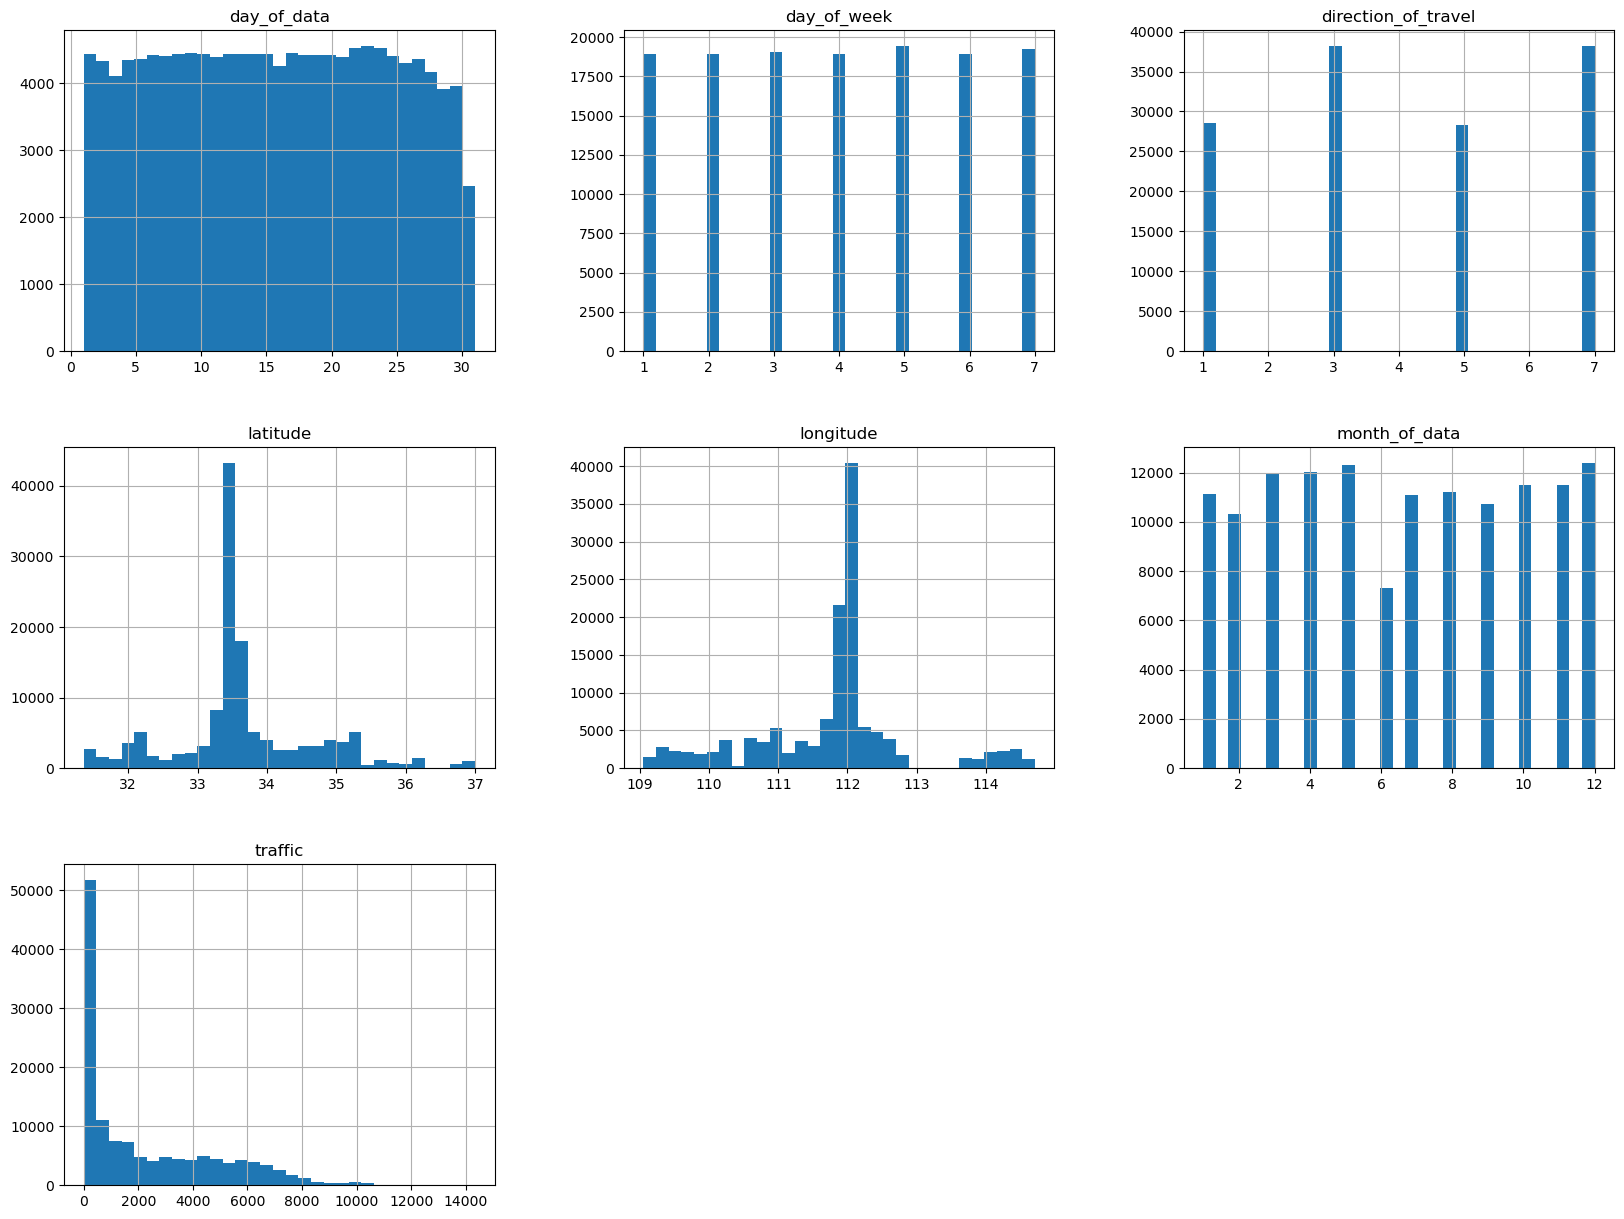

In [126]:
# Overview of  distributions 
dfArizona_M.hist(bins=31, figsize=(20,15))
plt.show()

* day of data: the lower traffic volume for 31st is likely attributable to not all months having 31st. We could check if there is a significant change in traffic volume for holidays (e.g. 25Dec)
* direction of travel: only four directions of travel.
* traffic volume is postive-skewed.

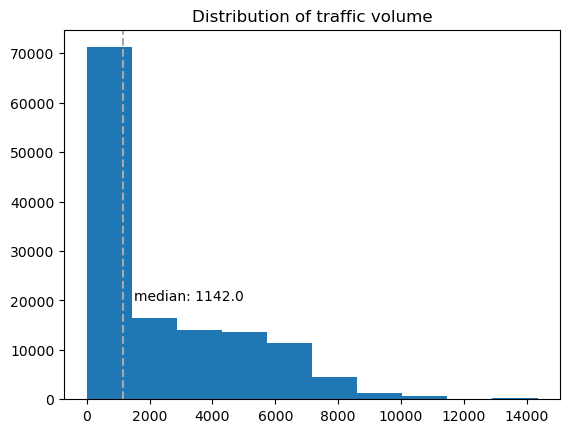

In [127]:
# Examine distribution of traffic volume
plt.hist(dfArizona_M['traffic'])
plt.title('Distribution of traffic volume')
plt.axvline(dfArizona_M['traffic'].median(), color='darkgrey', linestyle='dashed')
plt.annotate(f"median: {dfArizona_M['traffic'].median()}",xy=(1500,20000))
plt.show()

#### Feature Engineer Holidays
Arizona Holidays in 2015 per [url](https://www.public-holidays.us/mobile_US_EN_2015_Arizona)

In [130]:
# Step 2 Create dataframe of 2015 Arizona holidays
# holiday list
dates = ['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-19',
         '2015-07-3', '2015-07-04', '2015-09-07', '2015-10-12',
         '2015-11-11', '2015-11-26', '2015-12-25']
names = ["NewYear's Day", "MLK Day", "President's Day", "Memorial Day", "Juneteenth",
         "Independence Day Obs", "Independence Day", "Labor Day", "Columbus Day",
         "Veterans Day", "Thanksgiving", "Christmas"]
holidays = pd.DataFrame({'date':dates, 'name':names})
# Convert date to date format
holidays['date'] = pd.to_datetime(holidays['date'])
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12 non-null     datetime64[ns]
 1   name    12 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 320.0+ bytes


In [131]:
# Step 3 populate Arizona dataframe with holiday dates by date
dfArizona_M = pd.merge(dfArizona_M, holidays, how='left', on='date')

In [132]:
# Check dataframe after join
dfArizona_M.head(1)

,date,day_of_data,day_of_week,direction_of_travel,direction_of_travel_name,functional_classification,functional_classification_name,month_of_data,station_id,traffic,latitude,longitude,name
0,2015-05-23,23,7,3,East,4R,Rural: Minor Arterial,5,102210,52,34.036747,109.186545,NaN


In [133]:
# Step 4 Create feature 'holiday flag', 1 for holiday, 0 for non-holidays
# replace NaN in name with 0
dfArizona_M[['name']] = dfArizona_M[['name']].fillna(value=0)
dfArizona_M['holiday_flag'] = [0 if value == 0 else 1 for value in dfArizona_M['name']]
dfArizona_M.drop(['name'], axis=1, inplace=True)

In [134]:
# Check number of holidays
dfArizona_M['holiday_flag'].value_counts()

0    129243
1      4178
Name: holiday_flag, dtype: int64

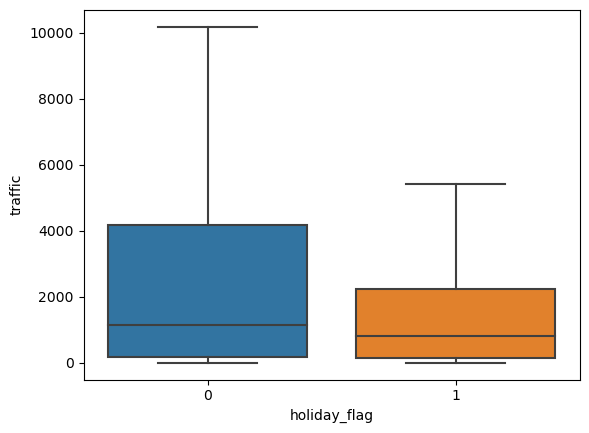

In [135]:
# Check the difference in traffic volume between holidays and non-holidays
sns.boxplot(dfArizona_M['holiday_flag'],dfArizona_M['traffic'],showfliers=False)
plt.show()

In [137]:
# Step 5 Perform statistical test
# Filter the dataframe
holiday_df = dfArizona_M[dfArizona_M['holiday_flag'] == 1]
nonholiday_df = dfArizona_M[dfArizona_M['holiday_flag'] == 0]

# Check the mean
print(holiday_df['traffic'].mean())
print(nonholiday_df['traffic'].mean())

1563.121589277166
2318.2103943733896


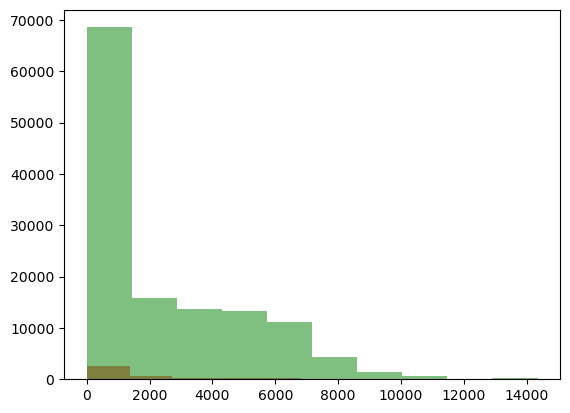

In [138]:
# Can't use t-test, since distribution is skewed.
plt.hist(holiday_df['traffic'], alpha=0.5, color='red')
plt.hist(nonholiday_df['traffic'], alpha=0.5, color='green')
plt.show()

The Mann-Whitney U test, sometimes called the Mann Whitney Wilcoxon Test or the Wilcoxon Rank Sum Test, is used to compare differences between two independent groups when the dependent variable is either ordinal or continuous, but not normally distributed

In [139]:
# use a mann-whitney u test
from scipy.stats import mannwhitneyu

In [140]:
mannwhitneyu(holiday_df['traffic'],
             nonholiday_df['traffic'])

MannwhitneyuResult(statistic=233090513.5, pvalue=1.5086015114467185e-51)

p-value less than 0.05. There is a statistical significance in the difference; it infers nonholidays have a higher traffic volume than holidays.

#### Feature Engineer cyclical features
For cyclical features such as day, month, we can opt to conduct feature engineering via the method explained in this blog [post](http://blog.davidkaleko.com/feature-engineering-cyclical-features.html)

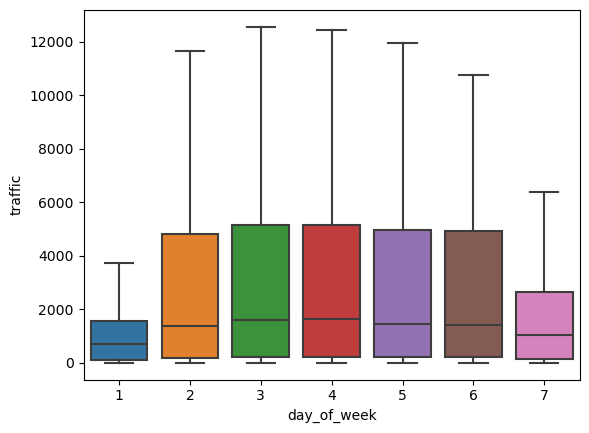

In [141]:
# Check the difference in traffic volume between days of week
sns.boxplot(dfArizona_M['day_of_week'],dfArizona_M['traffic'],showfliers=False)
plt.show()

In [142]:
# Step 6 Perform statistical test
# Filter the dataframe
Sun = dfArizona_M[dfArizona_M['day_of_week'] == 1]
Mon = dfArizona_M[dfArizona_M['day_of_week'] == 2]
Tue = dfArizona_M[dfArizona_M['day_of_week'] == 3]
Wed = dfArizona_M[dfArizona_M['day_of_week'] == 4]
Thu = dfArizona_M[dfArizona_M['day_of_week'] == 5]
Fri = dfArizona_M[dfArizona_M['day_of_week'] == 6]
Sat = dfArizona_M[dfArizona_M['day_of_week'] == 7]

# create list of above dataframes
Lst1 = [Sun, Mon, Tue, Wed, Thu, Fri, Sat]
Lst2 = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
# Check the median
for d, n in zip(Lst1, Lst2):
    print(n, d['traffic'].median())

Sun 686.5
Mon 1382.0
Tue 1596.0
Wed 1645.0
Thu 1464.0
Fri 1403.5
Sat 1051.5


A Kruskal-Wallis Test is used to determine whether or not there is a statistically significant difference between the medians of three or more independent groups. It is considered to be the non-parametric equivalent of the One-Way ANOVA.

In [143]:
# use a Kruskal-Wallis Test
from scipy.stats import kruskal

In [144]:
kruskal(Sun['traffic'], Mon['traffic'], Tue['traffic'], Wed['traffic'], Thu['traffic'],
        Fri['traffic'], Sat['traffic'])

KruskalResult(statistic=5807.345641733605, pvalue=0.0)

p-value less than 0.05. There is a statistical significance in the difference in traffic volume between the days of week. This also corresponds with the visualization of difference in traffic volume between weekdays and weekends.

In [145]:
# Step 7 Create features for day of week 
dfArizona_M['day_sin'] = np.sin((dfArizona_M['day_of_week']-1)*(2.*np.pi/7))
dfArizona_M['day_cos'] = np.cos((dfArizona_M['day_of_week']-1)*(2.*np.pi/7))

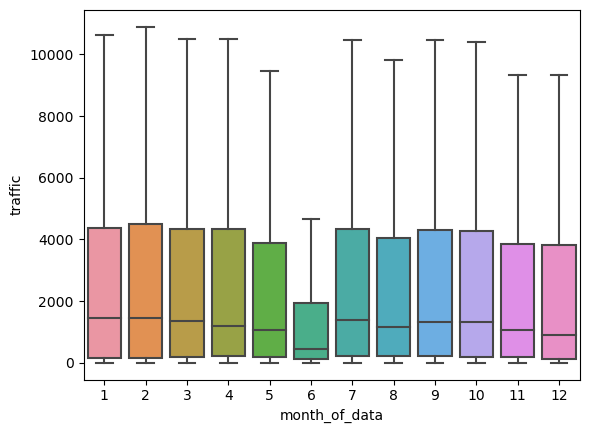

In [146]:
# Check the difference in traffic volume between months
sns.boxplot(dfArizona_M['month_of_data'],dfArizona_M['traffic'],showfliers=False)
plt.show()

In [147]:
# Step 8 Perform statistical test
# Filter the dataframe
Jan = dfArizona_M[dfArizona_M['month_of_data'] == 1]
Feb = dfArizona_M[dfArizona_M['month_of_data'] == 2]
Mar = dfArizona_M[dfArizona_M['month_of_data'] == 3]
Apr = dfArizona_M[dfArizona_M['month_of_data'] == 4]
May = dfArizona_M[dfArizona_M['month_of_data'] == 5]
Jun = dfArizona_M[dfArizona_M['month_of_data'] == 6]
Jul = dfArizona_M[dfArizona_M['month_of_data'] == 7]
Aug = dfArizona_M[dfArizona_M['month_of_data'] == 8]
Sep = dfArizona_M[dfArizona_M['month_of_data'] == 9]
Oct = dfArizona_M[dfArizona_M['month_of_data'] == 10]
Nov = dfArizona_M[dfArizona_M['month_of_data'] == 11]
Dec = dfArizona_M[dfArizona_M['month_of_data'] == 12]

# create list of above dataframes
Lst1 = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]
Lst2 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Check the median
for d, n in zip(Lst1, Lst2):
    print(n, d['traffic'].median())

Jan 1461.0
Feb 1463.0
Mar 1347.0
Apr 1201.0
May 1066.0
Jun 435.5
Jul 1399.0
Aug 1151.0
Sep 1332.0
Oct 1307.0
Nov 1073.0
Dec 900.0


In [148]:
kruskal(Jan['traffic'], Feb['traffic'], Mar['traffic'], Apr['traffic'], May['traffic'],
        Jun['traffic'], Jul['traffic'], Aug['traffic'], Sep['traffic'], Oct['traffic'],
        Nov['traffic'], Dec['traffic'])

KruskalResult(statistic=890.4711961518761, pvalue=6.931640639527078e-184)

p-value less than 0.05. There is a statistical significance in the difference in traffic volume between months.

In [149]:
# Step 9 Create features for month
dfArizona_M['mth_sin'] = np.sin((dfArizona_M['month_of_data']-1)*(2.*np.pi/12))
dfArizona_M['mth_cos'] = np.cos((dfArizona_M['month_of_data']-1)*(2.*np.pi/12))

#### Feature Engineer Direction of travel

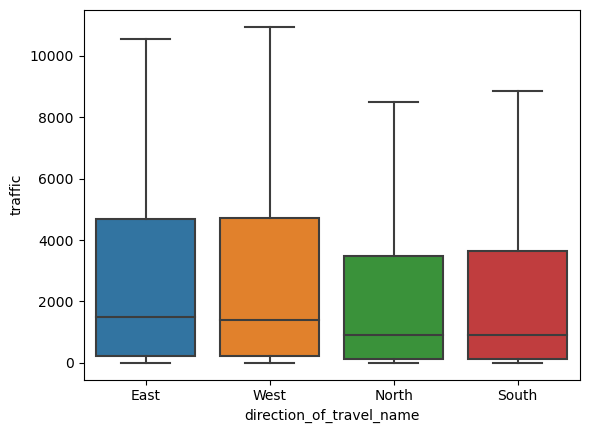

In [150]:
# Distribution of traffic per direction of travel
sns.boxplot(dfArizona_M['direction_of_travel_name'],dfArizona_M['traffic'],showfliers=False)
plt.show()

In [151]:
# Step 10 Perform statistical test
# Filter the dataframe
East = dfArizona_M[dfArizona_M['direction_of_travel_name'] == 'East']
West = dfArizona_M[dfArizona_M['direction_of_travel_name'] == 'West']
North = dfArizona_M[dfArizona_M['direction_of_travel_name'] == 'North']
South = dfArizona_M[dfArizona_M['direction_of_travel_name'] == 'South']

# create list of above dataframes
Lst1 = [East, West, North, South]
Lst2 = ['East', 'West', 'North', 'South']
# Check the median
for d, n in zip(Lst1, Lst2):
    print(n, d['traffic'].mean())

East 2462.9021125287595
West 2667.939399487367
North 1829.786546332249
South 2032.5904698081265


In [152]:
# Check if the mean of two groups are statistically different
mannwhitneyu(East['traffic'], West['traffic'])

MannwhitneyuResult(statistic=714135725.0, pvalue=1.1673637520422351e-08)

In [153]:
# Check if the mean of two groups are statistically different
mannwhitneyu(North['traffic'], South['traffic'])

MannwhitneyuResult(statistic=393305270.5, pvalue=5.625739921562104e-10)

p-value less than 0.05 for both tests. There is a statistical significance in the difference in traffic volume between both groups of direction of travel.

In [154]:
# Rename column name
dfArizona_M.rename(columns={'direction_of_travel_name': 'travel_dirn'},
                 inplace=True)

In [155]:
# Step 11 Create features for direction of travel
dirn_encoded=pd.get_dummies(data=dfArizona_M['travel_dirn'],
                            prefix='dirn',
                            drop_first=True)
dirn_encoded.head(5)

,dirn_North,dirn_South,dirn_West
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,1


Using the drop_first argument, we are representing the first label East using 0.

In [156]:
# Add created direction features to Arizona dataframe
dfArizona_M = pd.concat([dfArizona_M, dirn_encoded], axis=1)

#### Feature Engineer Highway Functional Classifications

In [157]:
# Step 12 Create a datadict for highway name and code
# using existing from Arizona dataframe
Hw_name = dfArizona_M['functional_classification_name'].unique()
Hw_code = dfArizona_M['functional_classification'].unique()
Hw_dataDict = pd.DataFrame({'hwName':Hw_name,
                            'hwCode':Hw_code})

In [158]:
grouped = dfArizona_M.groupby('functional_classification')
sorted_average = (pd.DataFrame
                  ({col: vals['traffic']
                    for col, vals in grouped}).mean().sort_values(ascending=True))

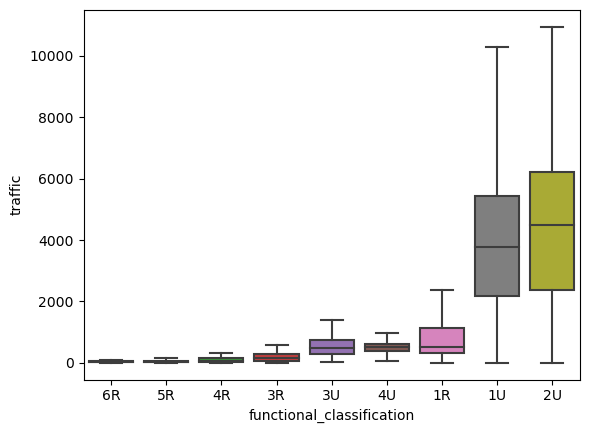

In [159]:
# Step 13 Distribution of traffic per direction of travel
sns.boxplot(dfArizona_M['functional_classification'],dfArizona_M['traffic'],showfliers=False,
            order=sorted_average.index)
plt.show()

It appears that there are three clusters for traffic volume regarding the highway functional classifications. Heavy traffic for 2U, 1U, medium traffic for 1R, 3U, 4U, low traffic for 4R, 3R, 5R, 6R.

In [160]:
Hw_dataDict

,hwName,hwCode
0,Rural: Minor Arterial,4R
1,Rural: Principal Arterial - Other,3R
2,Urban: Principal Arterial - Other Freeways or ...,2U
3,Rural: Major Collector,5R
4,Rural: Principal Arterial - Interstate,1R
5,Urban: Principal Arterial - Interstate,1U
6,Urban: Principal Arterial - Other,3U
7,Urban: Minor Arterial,4U
8,Rural: Minor Collector,6R


In [161]:
# Step 14 Create a feature for the hwCode 
# Heavy - 2U, 1U
# Medium - 1R,3U, 4U
# Low - 4R, 3R, 5R, 6R
dfArizona_M['hwVol'] = ['heavy' 
                      if dfArizona_M['functional_classification'][idx] == '2U'
                      or dfArizona_M['functional_classification'][idx] == '1U'
                      else 'medium'
                      if dfArizona_M['functional_classification'][idx] == '1R'
                      or dfArizona_M['functional_classification'][idx] == '3U'
                      or dfArizona_M['functional_classification'][idx] == '4U'
                      else 'low'
                      for idx in range(len(dfArizona_M))
                     ]

In [162]:
# Step 15 Encode the created column
hw_encoded=pd.get_dummies(data=dfArizona_M['hwVol'],
                            prefix='hw',
                            drop_first=True)
hw_encoded.head(5)

,hw_low,hw_medium
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Using the drop_first argument, we are representing the first label hw_heavy using 0.

In [163]:
# Add created direction features to Arizona dataframe
dfArizona_M = pd.concat([dfArizona_M, hw_encoded], axis=1)

In [164]:
dfArizona_M.head(1)

,date,day_of_data,day_of_week,direction_of_travel,travel_dirn,functional_classification,functional_classification_name,month_of_data,station_id,traffic,latitude,longitude,holiday_flag,day_sin,day_cos,mth_sin,mth_cos,dirn_North,dirn_South,dirn_West,hwVol,hw_low,hw_medium
0,2015-05-23,23,7,3,East,4R,Rural: Minor Arterial,5,102210,52,34.036747,109.186545,0,-0.781831,0.62349,0.866025,-0.5,0,0,0,low,1,0


In [ ]:
CHECKPOINT

# Feature Engineer Lat & Lon

Latitude and Longtitude coordinates are features representing a three dimensional space. The extreme values are actually close to each other. We can [map](https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature) them to the x, y, z coordinate space. This meant that the close points in the x, y, z coordinate space would also be close in reality. 

In [165]:
dfArizona_M['longitude'] = dfArizona_M['longitude']*-1

In [166]:
# Step 21 Map coordinates to x, y, z coordinates
# x-coordinate
dfArizona_M['x_coord'] = np.cos(
    dfArizona_M['latitude']) * np.cos(dfArizona_M['longitude'])
# y-coordinate
dfArizona_M['y_coord'] = np.cos(
    dfArizona_M['latitude']) * np.sin(dfArizona_M['longitude'])
# z-coordinate
dfArizona_M['z_coord'] = np.sin(dfArizona_M['latitude'])

In [167]:
# Review the dataframe
dfArizona_M.head(3)

,date,day_of_data,day_of_week,direction_of_travel,travel_dirn,functional_classification,functional_classification_name,month_of_data,station_id,traffic,latitude,longitude,holiday_flag,day_sin,day_cos,mth_sin,mth_cos,dirn_North,dirn_South,dirn_West,hwVol,hw_low,hw_medium,x_coord,y_coord,z_coord
0,2015-05-23,23,7,3,East,4R,Rural: Minor Arterial,5,102210,52,34.036747,-109.186545,0,-0.781831,0.623490,0.866025,-5.000000e-01,0,0,0,low,1,0,0.623225,0.603353,0.49755
1,2015-04-28,28,3,3,East,4R,Rural: Minor Arterial,4,102210,38,34.036747,-109.186545,0,0.974928,-0.222521,1.000000,6.123234e-17,0,0,0,low,1,0,0.623225,0.603353,0.49755
2,2015-11-12,12,5,3,East,4R,Rural: Minor Arterial,11,102210,57,34.036747,-109.186545,0,-0.433884,-0.900969,-0.866025,5.000000e-01,0,0,0,low,1,0,0.623225,0.603353,0.49755


In [138]:
# Step 21 Map coordinates to x, y, z coordinates
# x-coordinate
#dfArizona_merged['x_coord'] = np.cos(
 #   dfArizona_merged['latitude']) * np.cos(dfArizona_merged['longitude'])
# y-coordinate
#dfArizona_merged['y_coord'] = np.cos(
 #   dfArizona_merged['latitude']) * np.sin(dfArizona_merged['longitude'])
# z-coordinate
#dfArizona_merged['z_coord'] = np.sin(dfArizona_merged['latitude'])

In [139]:
# Review the dataframe
#dfArizona_merged.head(3)

,date,day_of_data,day_of_week,direction_of_travel,travel_dirn,functional_classification_x,functional_classification_name,month_of_data,station_id,traffic,holiday_flag,day_sin,day_cos,mth_sin,mth_cos,dirn_North,dirn_South,dirn_West,hwVol,hw_low,hw_medium,direction_of_travel_name,functional_classification_y,latitude,longitude,x_coord,y_coord,z_coord
0,2015-05-23,23,7,3,East,4R,Rural: Minor Arterial,5,102210,52,0,-0.781831,0.623490,0.866025,-5.000000e-01,0,0,0,low,1,0,West,4R,34.036747,109.186545,0.623225,-0.603353,0.49755
1,2015-04-28,28,3,3,East,4R,Rural: Minor Arterial,4,102210,38,0,0.974928,-0.222521,1.000000,6.123234e-17,0,0,0,low,1,0,West,4R,34.036747,109.186545,0.623225,-0.603353,0.49755
2,2015-11-12,12,5,3,East,4R,Rural: Minor Arterial,11,102210,57,0,-0.433884,-0.900969,-0.866025,5.000000e-01,0,0,0,low,1,0,West,4R,34.036747,109.186545,0.623225,-0.603353,0.49755


In [168]:
dfArizona_M.columns

Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'travel_dirn', 'functional_classification',
       'functional_classification_name', 'month_of_data', 'station_id',
       'traffic', 'latitude', 'longitude', 'holiday_flag', 'day_sin',
       'day_cos', 'mth_sin', 'mth_cos', 'dirn_North', 'dirn_South',
       'dirn_West', 'hwVol', 'hw_low', 'hw_medium', 'x_coord', 'y_coord',
       'z_coord'],
      dtype='object')

#### Add the proximity to airport (cluster label 0 and 1)

In [175]:
# Get the required columns
toAdd = df_statn_agg[['Cluster Labels', 'station_id']].copy()

In [185]:
# Get new dataframe from merge
dFrame = pd.merge(dfArizona_M,toAdd,on='station_id')
dFrame.rename(columns={'Cluster Labels':'airport_near'},inplace=True)

In [186]:
dFrame.columns

Index(['date', 'day_of_data', 'day_of_week', 'direction_of_travel',
       'travel_dirn', 'functional_classification',
       'functional_classification_name', 'month_of_data', 'station_id',
       'traffic', 'latitude', 'longitude', 'holiday_flag', 'day_sin',
       'day_cos', 'mth_sin', 'mth_cos', 'dirn_North', 'dirn_South',
       'dirn_West', 'hwVol', 'hw_low', 'hw_medium', 'x_coord', 'y_coord',
       'z_coord', 'airport_near'],
      dtype='object')

#### Drop columns
Retain the featured engineered columns for traffic volume prediction

In [187]:
# Step 22 Define list of columns to drop
colDrop = ['date',
           'day_of_data',
           'day_of_week',
           'direction_of_travel',
           'travel_dirn',
           'functional_classification',
           'functional_classification_name',
           'month_of_data',
           'station_id',
           'hwVol',
           'latitude',
           'longitude'
          ]

In [188]:
# Step 23 Create dataframe with columns for ML
dFrame_cleaned = dFrame.drop(columns=colDrop,axis=1)

In [190]:
# Review dataframe
dFrame_cleaned.head(1)

,traffic,holiday_flag,day_sin,day_cos,mth_sin,mth_cos,dirn_North,dirn_South,dirn_West,hw_low,hw_medium,x_coord,y_coord,z_coord,airport_near
0,52,0,-0.781831,0.62349,0.866025,-0.5,0,0,0,1,0,0.623225,0.603353,0.49755,0


In [191]:
# Step 24 Export dataframe as csv
dFrame_cleaned.to_csv('./archive/dataML2.csv')

#### Prepare datasets for Traffic Volume Prediction<a class="anchor" id="4"></a>

In [192]:
# Step 1 Create feature maxtrix, X and target vector, y
X = dFrame_cleaned.drop(columns='traffic')
y = dFrame_cleaned['traffic']
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (133421, 14)
y shape: (133421,)


If we were to use train/ test/ split to evaluate among many models, we should split the data into three parts: 
* training set: for building models
* validation set: for evaluating among many models
* test set: assessing the final model

we can split the data by 80-20 approach two times, stratify on holiday flags to ensure approximate consistent distribution of holiday flags across the different datasets.

In [193]:
# Import libraries 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [194]:
# Get an overview on % of holidays
X['holiday_flag'].value_counts(normalize=True)

0    0.968686
1    0.031314
Name: holiday_flag, dtype: float64

In [197]:
# Split the data once
X_interim, X_test, y_interim, y_test = train_test_split(X, y,
                                                        test_size = 0.2,
                                                        random_state = 42,
                                                        stratify=X['holiday_flag'])

In [198]:
# Split the data again
X_train, X_validate, y_train, y_validate = train_test_split(X_interim, y_interim,
                                                        test_size = 0.2,
                                                        random_state = 42,
                                                        stratify=X_interim['holiday_flag'])

In [199]:
# Get an overview on % of holidays after the split
print( X_train['holiday_flag'].value_counts(normalize=True) )

0    0.968684
1    0.031316
Name: holiday_flag, dtype: float64


Distribution of holiday flags mostly consistent across the splits. Let's do a stocktake here:
* train set: for building models
* validate set: for evaluating models
* interim set: for training the selected model
* test set: for assessing the selected model

Next we scale the variables, in case we use regularization techniques or distance-based models. It is also a good thing that we split the data first before scaling to prevent data leakage.

In [200]:
# Scaling
# Instantiate StandardScaler
ss1 = StandardScaler()
# Scale the train & validate set
# Fit to predictors in train set
ss1.fit(X_train)
X_trainSc = ss1.transform(X_train)
X_validateSc = ss1.transform(X_validate)

We use a dummy regressor to first establish baseline performance, in preparation to compare with other regressors. 

Model metrics would be Coefficient of Determination, R2 (the proportion of the variation in the dependent variable that is predictable from the independent variables) and Root Mean Squared Error (RMSE).

In [201]:
# Instantiate dummy regressor
dummyRegr = DummyRegressor(strategy="median")
# Fit on train scaled data
dummyRegr.fit(X_trainSc, y_train)
# Predict
y_d_train = dummyRegr.predict(X_trainSc)
y_d_validate = dummyRegr.predict(X_validateSc)

In [202]:
# Benchmark performance
# Coefficient of Determination (R2)
bench_r2train = round(dummyRegr.score(X_trainSc, y_train),4)
bench_r2validate = round(dummyRegr.score(X_validateSc, y_validate),4)
# Root-mean squared error (RMSE)
bench_rmsetrain = round(mean_squared_error(y_train, y_d_train)**0.5,4)
bench_rmsevalidate = round(mean_squared_error(y_validate, y_d_validate)**0.5,4)

In [203]:
# Benchmark performance
model = ['dummyRegressor']
r2Train = [bench_r2train]
r2Validate = [bench_r2validate]
rmseTrain = [bench_rmsetrain]
rmseValidate = [bench_rmsevalidate]
# Instantiate a dataframe to summarize model results
res = pd.DataFrame({'model':model,
                    'R2_Train':r2Train,
                    'R2_Validate':r2Validate,
                    'RMSE_Train':rmseTrain,
                    'RMSE_Validate':rmseValidate})
res

,model,R2_Train,R2_Validate,RMSE_Train,RMSE_Validate
0,dummyRegressor,-0.2026,-0.2046,2801.5339,2815.2829


In [204]:
# define function to collect model results in a new row
def newRow(modelName, R2Train, R2Validate, RMSETrain, RMSEValidate):
    new_row = {'model':modelName, 
               'R2_Train':R2Train,
               'R2_Validate':R2Validate,
               'RMSE_Train':RMSETrain,
               'RMSE_Validate':RMSEValidate}
    return new_row

#### Model Training<a class="anchor" id="5"></a>

#### Linear Regressor

In [205]:
# Instantiate linear model
lr = LinearRegression()
# Fit on train set
lr.fit(X_trainSc, y_train)
# Predict
y_lr_train = lr.predict(X_trainSc)
y_lr_validate = lr.predict(X_validateSc)

In [206]:
# R2
# Set cross-validation to 10 folds
lr_train_scores = round(cross_val_score(lr, X_trainSc, y_train, cv=10,
                                        scoring='r2').mean(),4)
lr_validate_scores = round(cross_val_score(lr, X_validateSc, y_validate, cv=10,
                                           scoring='r2').mean(),4)
# RMSE
lr_rmsetrain = round(mean_squared_error(y_train, y_lr_train)**0.5,4)
lr_rmsevalidate = round(mean_squared_error(y_validate, y_lr_validate)**0.5,4)

In [207]:
# Update result dataframe
res = res.append(newRow('linear regressor', 
                        lr_train_scores,
                        lr_validate_scores,
                        lr_rmsetrain,
                        lr_rmsevalidate),
                 ignore_index=True)

#### Lasso Regressor
Lasso regressor imposes a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero

In [209]:
# Instantiate LassoCV
# Pass in 200 number of alphas along regularization path
lasso = LassoCV(n_alphas=200)
# Fit on train set
lasso.fit(X_trainSc, y_train)
# Predict
y_la_train = lasso.predict(X_trainSc)
y_la_validate = lasso.predict(X_validateSc)

In [210]:
# R2
# Set cross-validation to 10 folds
la_train_scores = round(cross_val_score(lasso, X_trainSc, y_train, cv=10,
                                        scoring='r2').mean(),4)
la_validate_scores = round(cross_val_score(lasso, X_validateSc, y_validate, cv=10,
                                           scoring='r2').mean(),4)
# RMSE
la_rmsetrain = round(mean_squared_error(y_train, y_la_train)**0.5,4)
la_rmsevalidate = round(mean_squared_error(y_validate, y_la_validate)**0.5,4)

In [211]:
# Update result dataframe
res = res.append(newRow('lasso regressor', 
                        la_train_scores,
                        la_validate_scores,
                        la_rmsetrain,
                        la_rmsevalidate),
                 ignore_index=True)

#### Ridge Regressor

In [213]:
#Instantiate RidgeCV
# Pass in 200 number of alphas along regularization path, from 0.1 to 10."""
ridge = RidgeCV(alphas=np.linspace(0.1,10,200))
# Fit on train set
ridge.fit(X_trainSc, y_train)
# Predict
y_ri_train = ridge.predict(X_trainSc)
y_ri_validate = ridge.predict(X_validateSc)

In [214]:
# R2
# Set cross-validation to 10 folds
ri_train_scores = round(cross_val_score(ridge, X_trainSc, y_train, cv=10,
                                        scoring='r2').mean(),4)
ri_validate_scores = round(cross_val_score(ridge, X_validateSc, y_validate, cv=10,
                                           scoring='r2').mean(),4)
# RMSE
ri_rmsetrain = round(mean_squared_error(y_train, y_ri_train)**0.5,4)
ri_rmsevalidate = round(mean_squared_error(y_validate, y_ri_validate)**0.5,4)

In [215]:
# Update result dataframe
res = res.append(newRow('ridge regressor', 
                        ri_train_scores,
                        ri_validate_scores,
                        ri_rmsetrain,
                        ri_rmsevalidate),
                 ignore_index=True)

#### DecisionTree Regressor

In [217]:
# Instantiate tree regressor
tree = DecisionTreeRegressor(random_state=42)
# Fit on train set
tree.fit(X_train, y_train)
# Predict
y_tr_train = tree.predict(X_train)
y_tr_validate = tree.predict(X_validate)

In [218]:
# R2
# Set cross-validation to 10 folds
tr_train_scores = round(cross_val_score(tree, X_train, y_train, cv=10,
                                        scoring='r2').mean(),4)
tr_validate_scores = round(cross_val_score(tree, X_validate, y_validate, cv=10,
                                           scoring='r2').mean(),4)
# RMSE
tr_rmsetrain = round(mean_squared_error(y_train, y_tr_train)**0.5,4)
tr_rmsevalidate = round(mean_squared_error(y_validate, y_tr_validate)**0.5,4)

In [219]:
# Update result dataframe
res = res.append(newRow('decision tree regressor', 
                        tr_train_scores,
                        tr_validate_scores,
                        tr_rmsetrain,
                        tr_rmsevalidate),
                 ignore_index=True)

#### Bagging Regressor
Bagging or bootstrapping is a method of sampling with replacement. It is used to simulate many different samples or to empirically estimate the sampling distribution of a statistic.

With one decision tree, we only use the original sample and grow exactly one decision tree. For bagging regressor (i.e. a set of bagged decision trees), we have bootstrapped k different samples and grown one decision tree on each bootstrapped sample, then our predictions are aggregated.

In [221]:
# Instantiate bagging regressor
bagR = BaggingRegressor(random_state=42)
# Fit on train set
bagR.fit(X_train, y_train)
# Predict
y_br_train = bagR.predict(X_train)
y_br_validate = bagR.predict(X_validate)

In [222]:
# R2
# Set cross-validation to 10 folds
br_train_scores = round(cross_val_score(bagR, X_train, y_train, cv=10,
                                        scoring='r2').mean(),4)
br_validate_scores = round(cross_val_score(bagR, X_validate, y_validate, cv=10,
                                           scoring='r2').mean(),4)
# RMSE
br_rmsetrain = round(mean_squared_error(y_train, y_br_train)**0.5,4)
br_rmsevalidate = round(mean_squared_error(y_validate, y_br_validate)**0.5,4)

In [223]:
# Update result dataframe
res = res.append(newRow('bagging regressor', 
                        br_train_scores,
                        br_validate_scores,
                        br_rmsetrain,
                        br_rmsevalidate),
                 ignore_index=True)

#### Random Forest Regressor
In bagged decision trees, every variable is considered as a "candidate" for splitting at each node in the decision tree. In random forests, a random subset of variables is considered as candidataes for splitting at each node. As features are randmly selected for each split, the individual decision trees are less correlated. This in turn decreases the variance of our predictions after aggregating the different decision trees. Thus, a random forest usually has less variance than bagged decision trees.

In [225]:
# Instantiate bagging regressor
rfR = RandomForestRegressor(random_state=42)
# Fit on train set
rfR.fit(X_train, y_train)
# Predict
y_rf_train = rfR.predict(X_train)
y_rf_validate = rfR.predict(X_validate)

In [226]:
# R2
# Set cross-validation to 5 folds 
rf_train_scores = round(cross_val_score(rfR, X_train, y_train, cv=5, 
                                        scoring='r2').mean(),4)
rf_validate_scores = round(cross_val_score(rfR, X_validate, y_validate, cv=5,
                                           scoring='r2').mean(),4)
# RMSE
rf_rmsetrain = round(mean_squared_error(y_train, y_rf_train)**0.5,4)
rf_rmsevalidate = round(mean_squared_error(y_validate, y_rf_validate)**0.5,4)

In [227]:
# Update result dataframe
res = res.append(newRow('random forest regressor', 
                        rf_train_scores,
                        rf_validate_scores,
                        rf_rmsetrain,
                        rf_rmsevalidate),
                 ignore_index=True)

#### Adaboost Regressor
Boosting is an ensemble technique where new models are added to correct existing models' errors. In the case of the Adaboost regressor, A regressor model is fitted on the original dataset. Additional copies of the regressor model on the same dataset but with the weights of instances adjusted according to the error of the current prediction.

In [229]:
# Instantiate bagging regressor
adaboostR = AdaBoostRegressor(random_state=42)
# Fit on train set
adaboostR.fit(X_train, y_train)
# Predict
y_aR_train = adaboostR.predict(X_train)
y_aR_validate = adaboostR.predict(X_validate)

In [230]:
# R2
# Set cross-validation to 10 folds 
aR_train_scores = round(cross_val_score(adaboostR, X_train, y_train, cv=10,
                                        scoring='r2').mean(),4)
aR_validate_scores = round(cross_val_score(adaboostR, X_validate, y_validate, cv=10,
                                           scoring='r2').mean(),4)
# RMSE
aR_rmsetrain = round(mean_squared_error(y_train, y_aR_train)**0.5,4)
aR_rmsevalidate = round(mean_squared_error(y_validate, y_aR_validate)**0.5,4)

In [231]:
# Update result dataframe
res = res.append(newRow('adaboost regressor', 
                        aR_train_scores,
                        aR_validate_scores,
                        aR_rmsetrain,
                        aR_rmsevalidate),
                 ignore_index=True)

In [232]:
res

,model,R2_Train,R2_Validate,RMSE_Train,RMSE_Validate
0,dummyRegressor,-0.2026,-0.2046,2801.5339,2815.2829
1,linear regressor,0.7018,0.7047,1394.8032,1393.7591
2,lasso regressor,0.7018,0.7047,1394.8215,1393.7655
3,ridge regressor,0.7018,0.7047,1394.8033,1393.7605
4,decision tree regressor,0.9546,0.9361,328.8040,538.8552
5,bagging regressor,0.9608,0.9567,343.2151,501.7827
6,random forest regressor,0.9624,0.9596,335.0248,492.1194
7,adaboost regressor,0.7367,0.7361,1291.0769,1287.3773


#### XgBoost Regressor
Xgboost uses gradient boosting, where new models are created that predict the residuals of previous models. A gradient descent algorithm is used to minimize the error when adding new models. Collectively, the models are added together to make the final prediction.

In [233]:
# import libraries
from xgboost import XGBRegressor, plot_importance

In [234]:
# Instantiate xgboost regressor
xg = XGBRegressor(random_state=42)
# Fit on train set
xg.fit(X_train, y_train)
# Predict
y_xg_train = xg.predict(X_train)
y_xg_validate = xg.predict(X_validate)

In [235]:
# R2
# Set cross-validation to 10 folds 
xg_train_scores = round(cross_val_score(xg, X_train, y_train, cv=10,
                                        scoring='r2').mean(),4)
xg_validate_scores = round(cross_val_score(xg, X_validate, y_validate, cv=10,
                                           scoring='r2').mean(),4)
# RMSE
xg_rmsetrain = round(mean_squared_error(y_train, y_xg_train)**0.5,4)
xg_rmsevalidate = round(mean_squared_error(y_validate, y_xg_validate)**0.5,4)

In [236]:
# Update result dataframe
res = res.append(newRow('xgboost regressor', 
                        xg_train_scores,
                        xg_validate_scores,
                        xg_rmsetrain,
                        xg_rmsevalidate),
                 ignore_index=True)

In [237]:
# Review the model results
res

,model,R2_Train,R2_Validate,RMSE_Train,RMSE_Validate
0,dummyRegressor,-0.2026,-0.2046,2801.5339,2815.2829
1,linear regressor,0.7018,0.7047,1394.8032,1393.7591
2,lasso regressor,0.7018,0.7047,1394.8215,1393.7655
3,ridge regressor,0.7018,0.7047,1394.8033,1393.7605
4,decision tree regressor,0.9546,0.9361,328.8040,538.8552
5,bagging regressor,0.9608,0.9567,343.2151,501.7827
6,random forest regressor,0.9624,0.9596,335.0248,492.1194
7,adaboost regressor,0.7367,0.7361,1291.0769,1287.3773
8,xgboost regressor,0.9693,0.9651,424.6063,448.1820


#### Model Evaluation<a class="anchor" id="6"></a>

The xgboost regressor is the best performing regressor among the models, from the R2 (highest) and RMSE(lowest) values. The comparison of the train and validate scores indicate that the model is slightly overfitted - validate RMSE larger than train RMSE. 

We will proceed with the xgboost regressor model. We can further 
* review the feature importance 
* conduct hyperparameter tuning

#### Feature Importance<a class="anchor" id="7"></a>
Importance provides a measure on usefulness of the feature (predictor variable) towards a regressor model's predictive performance.

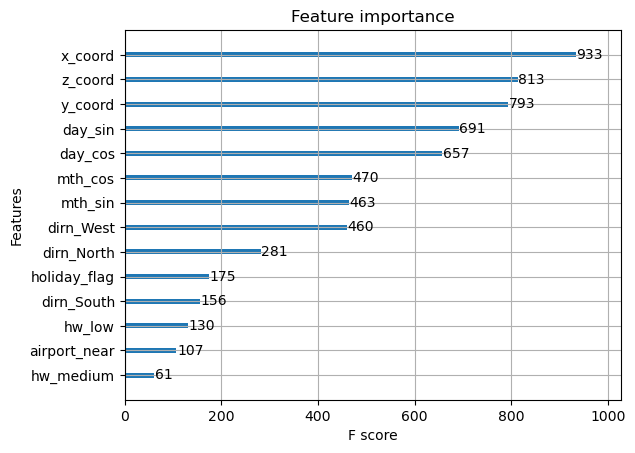

In [238]:
# Use xgboost built-in feature importance plot
plot_importance(xg)
plt.show()

We see that the top five features are geo coordinates and day of week.

Discussion on feature selection: if we are to drop features, we have to be mindful that the model would need to be retrained on a lesser-feature train set and then be evaluated on a lesser-feature validate set. Dropping features does not necessarily lead to improved model prediction performance. We proceed to tune the model for potential model improvements.

#### Hyperparameter Tuning<a class="anchor" id="8"></a>

In [239]:
# define pipeline
xgPipe = Pipeline([('xgb', XGBRegressor(random_state=42) )])

In [240]:
# Review the list of params available
xgPipe.get_params()

{'memory': None,
 'steps': [('xgb',
   XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=42, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None))],
 'verbose': False,
 'xgb': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=

Parameters
* **max_depth**: maximum depth of tree, used to control over-fitting. Higher values will lead model to be overfitted and not be able to generalize well. Typical values 3 to 10, default 6.
* **learning_rate**: determines optimum number of trees. Typical values 0.1 to 0.3.
* **n_estimators**: number of gradient boosted trees.
* **gamma**: specifies the minimum loss reduction to make a split. A node is split only when the resulting split gives a positive reduction in the loss function. Typical values 0.5 to 0.9
* **min_child_weight**: minimum sum weights of all observations required in a child. Higher values prevent model from overfitting, but too low a value will lead to underfitting.
* **subsample**: fraction of observations to be randomly sampled for each tree. Low values prevents overfitting, but too low a value may lead to underfitting. Typical values 0.5 to 1.
* **colsample_bytree**: number of columns to be randomly sampled for each tree. Typical values 0.5 to 1.

In [241]:
# Define dictionary of hyperparameters.
pipeline_params = {
    'xgb__max_depth': [4,6],
    'xgb__learning_rate' : [0.1, 0.2],
    'xgb__n_estimators' : [100,125],
    'xgb__gamma': [0.5,0.9],
    'xgb__min_child_weight': [3,5],
    'xgb__subsample': [0.5,1.0],
    'xgb__colsample_bytree': [0.5,1.0]
}

In [242]:
# Instantiate GridSearchCV
xg_gs = GridSearchCV(xgPipe,
                     pipeline_params,
                     cv=5,
                     verbose=2,
                     scoring='r2')

#### Note: If model fit takes too long (part1)
Best model parameters has been saved to pickle file. It can be loaded in as an alternative. To do so, 
* comment out below code cell [0] Fit to train data, and move on to next part.

In [243]:
# [0] Fit to train data
xg_gs.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   1.7s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   1.9s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   1.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   1.1s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   1.1s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   5.8s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.2s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.0s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.1s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   2.3s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   2.4s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   2.5s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   1.9s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   1.9s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.0s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   2.1s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   2.0s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   2.0s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.3s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.3s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.4s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   1.7s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   1.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   1.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.7s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   2.0s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   1.9s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   1.8s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   2.4s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   2.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   2.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   1.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   1.9s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   1.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.6s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.9s
[CV] xgb__colsample_bytree=0.5, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   1.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   1.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   2.2s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.4s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.8s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   3.3s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   3.8s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   3.5s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   3.6s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.6s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.7s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.7s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   1.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   1.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   2.2s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   4.5s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   4.6s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5, total=   4.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   3.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   3.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0, total=   4.2s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.5, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.8s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   3.1s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5, total=   2.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=4, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   3.6s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   3.6s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0, total=   3.8s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   5.1s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   5.0s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5, total=   4.8s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.1, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=125, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   2.6s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   2.5s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0, total=   2.8s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=4, xgb__min_child_weight=3, xgb__n_estimators=125, xgb__subsample=1.0 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   4.0s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   3.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5, total=   4.1s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=3, xgb__n_estimators=100, xgb__subsample=0.5 
[CV]  x

[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   3.0s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   3.0s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0, total=   3.9s
[CV] xgb__colsample_bytree=1.0, xgb__gamma=0.9, xgb__learning_rate=0.2, xgb__max_depth=6, xgb__min_child_weight=5, xgb__n_estimators=100, xgb__subsample=1.0 
[CV]  x

[Parallel(n_jobs=1)]: Done 640 out of 640 | elapsed: 30.8min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     min_child_weight=None,
                                      

#### Note: If model fit takes too long (part1)
Best model parameters has been saved to pickle file. It can be loaded in as an alternative
* uncomment the code under [1] Load the pickled model, to load the pickled model
* comment out the code under [2] Save the best model parameters

In [244]:
# [1] Load the pickled model
#filename = 'bestModel.sav'
#xg_gs_best = pickle.load(open(filename, 'rb'))

# [2] Save the best model parameters
xg_gs_best = xg_gs.best_estimator_ # please comment out this line if loading pickled model

In [245]:
# Checking the scores -  R2 based on param setting
xgbest_r2train = round(xg_gs_best.score(X_train, y_train),4)
xgbest_r2validate = round(xg_gs_best.score(X_validate, y_validate),4)
print(f"R2 on train set: {xgbest_r2train}")
print(f"R2 validate set: {xgbest_r2validate}")

R2 on train set: 0.972
R2 validate set: 0.9695


In [246]:
# Predict
y_xgbest_train = xg_gs_best.predict(X_train)
y_xgbest_validate = xg_gs_best.predict(X_validate)
# RMSE
xgbest_rmsetrain = round(mean_squared_error(y_train, y_xgbest_train)**0.5,4)
xgbest_rmsevalidate = round(mean_squared_error(y_validate, y_xgbest_validate)**0.5,4)
print(f"RMSE on train set: {xgbest_rmsetrain}")
print(f"RMSE validate set: {xgbest_rmsevalidate}")

RMSE on train set: 427.2285
RMSE validate set: 447.7724


#### Model Train-Test Evaluation<a class="anchor" id="9"></a>

#### Note: If model fit takes too long (part2)
* comment out the code under [3] Instantiate best model
* uncomment the code under [4] Instantiate best model from pickle file, to load the pickled model

In [247]:
# [3] Instantiate best model
xgModel = xg_gs.best_estimator_ # please comment out this line if loading pickled model

# [4] Instantiate best model from pickle file, uncomment code below to run
#xgModel = xg_gs_best 

In [248]:
# fit to the full train set (X_interim, y_interim)
xgModel.fit(X_interim, y_interim)

Pipeline(steps=[('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1.0, gamma=0.5, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.2,
                              max_delta_step=0, max_depth=6, min_child_weight=5,
                              missing=nan, monotone_constraints='()',
                              n_estimators=125, n_jobs=0, num_parallel_tree=1,
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=0.5,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [249]:
# Checking the scores -  R2 based on param setting
xgbest_r2interim = round(xgModel.score(X_interim, y_interim),4)
xgbest_r2test = round(xgModel.score(X_test, y_test),4)
print(f"R2 on full train set: {xgbest_r2interim}")
print(f"R2 test set: {xgbest_r2test}")

R2 on full train set: 0.972
R2 test set: 0.9682


In [250]:
# Predict
y_xgbest_interim = xgModel.predict(X_interim)
y_xgbest_test = xgModel.predict(X_test)
# RMSE
xgbest_rmseinterim = round(mean_squared_error(y_interim, y_xgbest_interim)**0.5,4)
xgbest_rmsetest = round(mean_squared_error(y_test, y_xgbest_test)**0.5,4)
print(f"RMSE on full train set: {xgbest_rmseinterim}")
print(f"RMSE test set: {xgbest_rmsetest}")

RMSE on full train set: 428.1486
RMSE test set: 453.1599


In [251]:
#headers = ['R2', 'RMSE']
best_r2 = [ xgbest_r2train, xgbest_r2validate, xgbest_r2interim, xgbest_r2test]
best_rmse = [ xgbest_rmsetrain, xgbest_rmsevalidate, xgbest_rmseinterim, xgbest_rmsetest]

In [252]:
# Put R2 and RMSE for best model into data frame
summary = pd.DataFrame({'R2':best_r2,
                        'RMSE':best_rmse
                       },['train', 'validate', 'full train', 'test'])
summary

,R2,RMSE
train,0.9720,427.2285
validate,0.9695,447.7724
full train,0.9720,428.1486
test,0.9682,453.1599


#### Conclusion<a class="anchor" id="10"></a>
* With tuning, the model performance has increased marginally (lower validate rmse than the vanilla xgboost regressor). There is evidence of overfitting in the model, with consistently higher rmse on validate & test sets. More parameters could be experimented with to potentially address overfitting.
* External data such as weather data could potentially be explored to improve model performance.

In [254]:
# Export the model
import pickle
# Save model
filename = 'bestModel.sav'
pickle.dump(xgModel, open(filename, 'wb'))

---